In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

sb.set()

### Import Dataset

In [2]:
df = pd.read_csv('Dataset.csv', index_col=0)
df.head()

,ADI,Age,person_id,Gender,Subgroup,absence_indicator,analytic_period_id,tenure,overtime,salary,...,extreme_heat_ssp585_2045,wildfire_potential_2018,wildfire_potential_2019,wildfire_potential_2019.1,wildfire_potential_ssp245_2025,wildfire_potential_ssp245_2035,wildfire_potential_ssp245_2045,wildfire_potential_ssp585_2025,wildfire_potential_ssp585_2035,wildfire_potential_ssp585_2045
0,28,37,3030515063,Male,Subgroup P,0,1,18.25,1,115700.0,...,13.380953,10.975000,11.460870,12.070652,6.033403,6.347014,6.512159,6.093082,6.504460,6.743331
1,18,34,9786383567,Male,Subgroup P,0,1,3.99,7,81435.0,...,13.380953,11.141304,11.520652,11.871739,6.033403,6.347014,6.512159,6.093082,6.504460,6.743331
2,15,36,5602306401,Male,Subgroup P,0,1,3.05,1,86400.0,...,15.597403,10.393478,10.777174,11.659783,6.064177,6.380910,6.548825,6.117186,6.522880,6.771772
3,36,41,8107765424,Male,Subgroup P,0,1,20.29,1,79176.0,...,12.290043,11.039130,11.023913,11.963043,6.069724,6.365864,6.512409,6.091926,6.469195,6.700504
4,49,51,7879842771,Male,Subgroup P,0,1,13.66,7,94511.0,...,12.290043,10.760870,11.308696,12.006522,6.069724,6.365864,6.512409,6.091926,6.469195,6.700504


In [3]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (43184, 74)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43184 entries, 0 to 43183
Data columns (total 74 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ADI                                 43184 non-null  int64  
 1   Age                                 43184 non-null  int64  
 2   person_id                           43184 non-null  int64  
 3   Gender                              43184 non-null  object 
 4   Subgroup                            43184 non-null  object 
 5   absence_indicator                   43184 non-null  int64  
 6   analytic_period_id                  43184 non-null  int64  
 7   tenure                              43184 non-null  float64
 8   overtime                            43184 non-null  int64  
 9   salary                              43184 non-null  float64
 10  performance_rating                  43184 non-null  int64  
 11  BiometricScreeningParticipants      43184 non-

In [5]:
data_dtypes = {}
for column in df.columns:
    # print('{}:{}'.format(column, df[column].isna().sum()))
    data_dtypes[column] =  df[column].dtype
    
print(data_dtypes)

{'ADI': dtype('int64'), 'Age': dtype('int64'), 'person_id': dtype('int64'), 'Gender': dtype('O'), 'Subgroup': dtype('O'), 'absence_indicator': dtype('int64'), 'analytic_period_id': dtype('int64'), 'tenure': dtype('float64'), 'overtime': dtype('int64'), 'salary': dtype('float64'), 'performance_rating': dtype('int64'), 'BiometricScreeningParticipants': dtype('int64'), 'HRQParticipants': dtype('int64'), 'lsbio_cholesterol': dtype('int64'), 'lsbio_glucose': dtype('int64'), 'lsbio_bp': dtype('int64'), 'lsbio_weight': dtype('int64'), 'lsbio_trig': dtype('int64'), 'lshrq_physact': dtype('int64'), 'lshrq_tobacco': dtype('int64'), 'lshrq_nutrition': dtype('int64'), 'lshrq_stress': dtype('int64'), 'lshrq_genHealth': dtype('int64'), 'lshrq_wellbeing': dtype('int64'), 'lshrq_alcohol': dtype('int64'), 'lshrq_sleeping': dtype('int64'), 'cc_RespiratorySinusAllergy_chronic': dtype('int64'), 'cc_diabetes': dtype('int64'), 'cc_cancer': dtype('int64'), 'cc_mskChronic': dtype('int64'), 'cc_cholesterol': d

### Split data into individual period

In [6]:
# split into individual analytical periods

df_2018 = df.loc[(df.analytic_period_id==1) & (df.Subgroup=='Subgroup P')]
df_2019 = df.loc[(df.analytic_period_id==2) & (df.Subgroup=='Subgroup P')]
df_2020 = df.loc[(df.analytic_period_id==3) & (df.Subgroup=='Subgroup P')]

In [7]:
print("2018 dims : ", df_2018.shape)
print("2019 dims : ", df_2019.shape)
print("2020 dims : ", df_2020.shape)

2018 dims :  (7249, 74)
2019 dims :  (6384, 74)
2020 dims :  (5990, 74)


### Multinomial Logistic Regression

#### Find the significant health factors to the performance rating

#### 2018

/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/1576075116.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/1576075116.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vecto

Train Set : (5436, 1) (5436, 30)
Test Set  : (1813, 1) (1813, 30)
Intercept of Regression 	: b =  [-0.67159409  1.63381537 -0.96222128]
                            Predictors  Coefficients
0                                  ADI     -0.000588
1                                  Age     -0.016515
2                    lsbio_cholesterol      0.035249
3                        lsbio_glucose     -0.058931
4                             lsbio_bp      0.132702
5                         lsbio_weight      0.134249
6                           lsbio_trig     -0.042109
7                        lshrq_physact     -0.103098
8                        lshrq_tobacco     -0.129832
9                      lshrq_nutrition     -0.103239
10                        lshrq_stress     -0.013841
11                     lshrq_genHealth     -0.186366
12                     lshrq_wellbeing     -0.043150
13                       lshrq_alcohol     -0.097480
14                      lshrq_sleeping     -0.092463
15  cc_Respirato

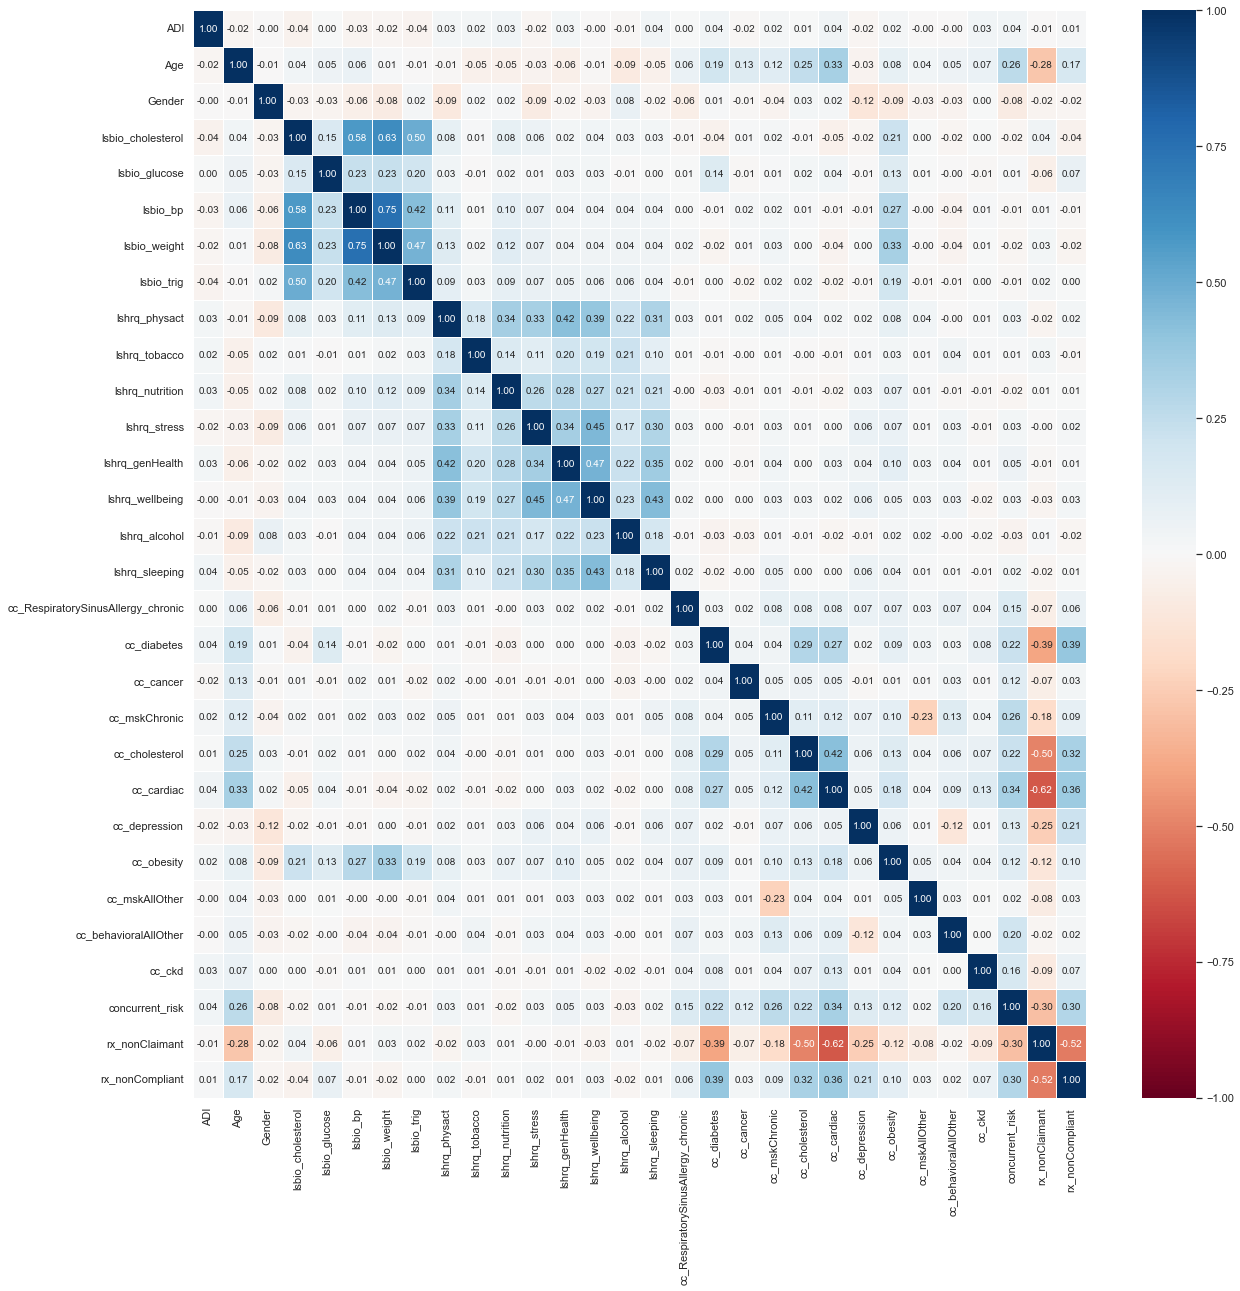

In [8]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_2018['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_2018[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(x.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

logreg.fit(x_train, y_train)

print('Intercept of Regression \t: b = ', logreg.intercept_)

coef_value = pd.DataFrame(list(zip(x.columns, logreg.coef_[0])), columns = ["Predictors", "Coefficients"])
print(coef_value)

y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [9]:
# check vif data

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_vif_constant = sm.add_constant(x_train)

vif_data = pd.DataFrame()
vif_data['Variable'] = x_vif_constant.columns
vif_data['VIF'] = [variance_inflation_factor(x_vif_constant.values, i) for i in range(x_vif_constant.shape[1])]

vif_data

,Variable,VIF
0,const,44.796000
1,ADI,1.016881
2,Age,1.227074
3,lsbio_cholesterol,1.860866
4,lsbio_glucose,1.106977
5,lsbio_bp,2.386427
6,lsbio_weight,2.733561
7,lsbio_trig,1.467031
8,lshrq_physact,1.447099
9,lshrq_tobacco,1.102227


In [10]:
import statsmodels.api as sm

x_with_constant = sm.add_constant(x)
model = sm.MNLogit(y, x_with_constant)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.480043
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:     performance_rating   No. Observations:                 7249
Model:                        MNLogit   Df Residuals:                     7187
Method:                           MLE   Df Model:                           60
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                 0.03063
Time:                        09:59:55   Log-Likelihood:                -3479.8
converged:                       True   LL-Null:                       -3589.8
Covariance Type:            nonrobust   LLR p-value:                 4.283e-20
              performance_rating=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  6.2707      0.552    

In [11]:
significant_variable_2018 = {}

p_value_dataframe = pd.DataFrame(result.pvalues)
p_value_dataframe = p_value_dataframe.rename(columns={0: 'rating3', 1: 'rating4'})
p_value_dataframe = p_value_dataframe.round(2)

significant_variable_2018['performance 3'] = p_value_dataframe[(p_value_dataframe['rating3'] < 0.1)].index.tolist()
significant_variable_2018['performance 4'] = p_value_dataframe[(p_value_dataframe['rating4'] < 0.1)].index.tolist()

print(significant_variable_2018)

{'performance 3': ['const', 'ADI', 'Age', 'cc_depression', 'cc_mskAllOther', 'cc_ckd', 'concurrent_risk', 'Gender_1'], 'performance 4': ['const', 'lshrq_genHealth', 'lshrq_alcohol', 'cc_mskChronic', 'cc_depression', 'cc_mskAllOther', 'cc_ckd', 'concurrent_risk', 'Gender_1']}


#### 2019

/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/2426842272.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/2426842272.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vecto

Train Set : (4788, 1) (4788, 30)
Test Set  : (1596, 1) (1596, 30)
Intercept of Regression 	: b =  [-0.40043014  1.10510055 -0.7046704 ]
                            Predictors  Coefficients
0                                  ADI     -0.008218
1                                  Age     -0.014589
2                    lsbio_cholesterol      0.058599
3                        lsbio_glucose      0.105806
4                             lsbio_bp     -0.260772
5                         lsbio_weight     -0.134605
6                           lsbio_trig     -0.052013
7                        lshrq_physact     -0.093586
8                        lshrq_tobacco     -0.063303
9                      lshrq_nutrition     -0.363329
10                        lshrq_stress      0.048055
11                     lshrq_genHealth     -0.016059
12                     lshrq_wellbeing      0.009900
13                       lshrq_alcohol     -0.004545
14                      lshrq_sleeping      0.114731
15  cc_Respirato

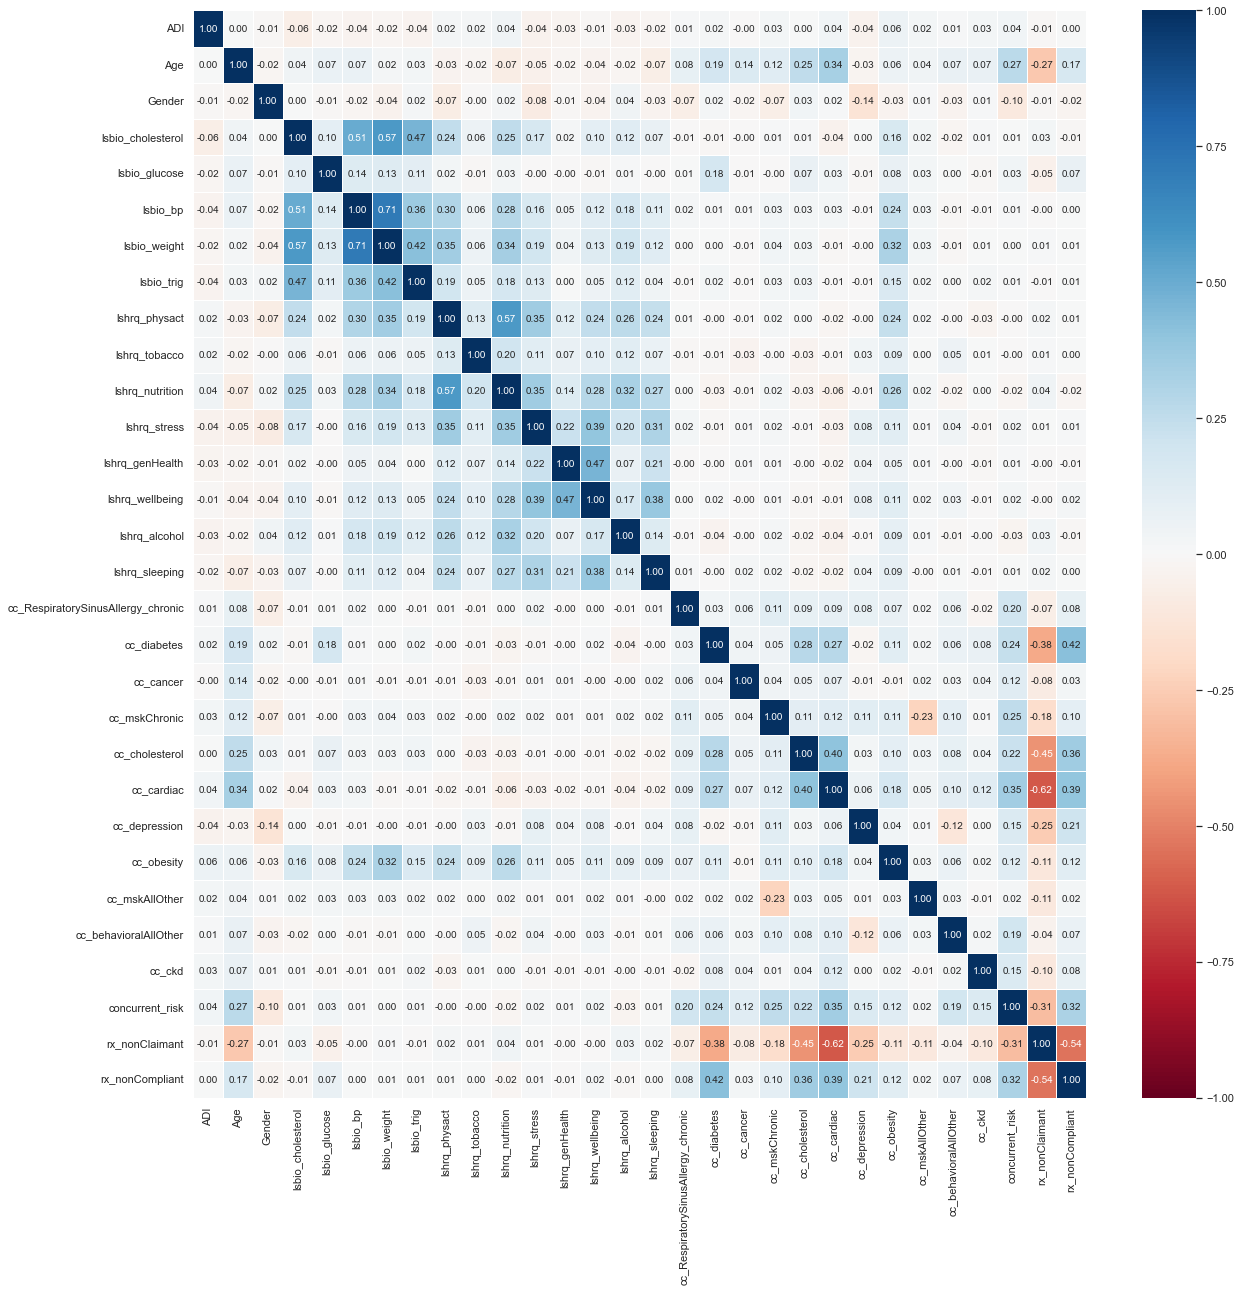

In [12]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_2019['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_2019[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(x.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

logreg.fit(x_train, y_train)

print('Intercept of Regression \t: b = ', logreg.intercept_)

coef_value = pd.DataFrame(list(zip(x.columns, logreg.coef_[0])), columns = ["Predictors", "Coefficients"])
print(coef_value)

y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [13]:
# check vif data

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_vif_constant = sm.add_constant(x_train)

vif_data = pd.DataFrame()
vif_data['Variable'] = x_vif_constant.columns
vif_data['VIF'] = [variance_inflation_factor(x_vif_constant.values, i) for i in range(x_vif_constant.shape[1])]

vif_data

,Variable,VIF
0,const,46.236736
1,ADI,1.025824
2,Age,1.208173
3,lsbio_cholesterol,1.698852
4,lsbio_glucose,1.071727
5,lsbio_bp,2.080221
6,lsbio_weight,2.457636
7,lsbio_trig,1.368493
8,lshrq_physact,1.661996
9,lshrq_tobacco,1.061111


In [14]:
import statsmodels.api as sm

x_with_constant = sm.add_constant(x)
model = sm.MNLogit(y, x_with_constant)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.454846
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:     performance_rating   No. Observations:                 6384
Model:                        MNLogit   Df Residuals:                     6322
Method:                           MLE   Df Model:                           60
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                 0.02222
Time:                        09:59:59   Log-Likelihood:                -2903.7
converged:                       True   LL-Null:                       -2969.7
Covariance Type:            nonrobust   LLR p-value:                 2.514e-07
              performance_rating=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  4.2597      0.587    

In [15]:
significant_variable_2019 = {}

p_value_dataframe = pd.DataFrame(result.pvalues)
p_value_dataframe = p_value_dataframe.rename(columns={0: 'rating3', 1: 'rating4'})
p_value_dataframe = p_value_dataframe.round(2)

significant_variable_2019['performance 3'] = p_value_dataframe[(p_value_dataframe['rating3'] < 0.1)].index.tolist()
significant_variable_2019['performance 4'] = p_value_dataframe[(p_value_dataframe['rating4'] < 0.1)].index.tolist()

print(significant_variable_2019)

{'performance 3': ['const', 'lsbio_glucose', 'lshrq_nutrition', 'lshrq_sleeping', 'concurrent_risk', 'Gender_1'], 'performance 4': ['const', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lshrq_nutrition', 'lshrq_sleeping', 'cc_mskChronic', 'Gender_1']}


#### 2020

/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/3208961863.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/3208961863.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vecto

Train Set : (4492, 1) (4492, 30)
Test Set  : (1498, 1) (1498, 30)
Intercept of Regression 	: b =  [-0.38647015  1.3394054  -0.95293525]
                            Predictors  Coefficients
0                                  ADI     -0.014307
1                                  Age     -0.023623
2                    lsbio_cholesterol      0.092679
3                        lsbio_glucose      0.021195
4                             lsbio_bp      0.053247
5                         lsbio_weight     -0.045269
6                           lsbio_trig      0.064992
7                        lshrq_physact     -0.060681
8                        lshrq_tobacco     -0.047035
9                      lshrq_nutrition     -0.152297
10                        lshrq_stress     -0.007422
11                     lshrq_genHealth      0.021083
12                     lshrq_wellbeing      0.106991
13                       lshrq_alcohol     -0.130249
14                      lshrq_sleeping      0.048560
15  cc_Respirato

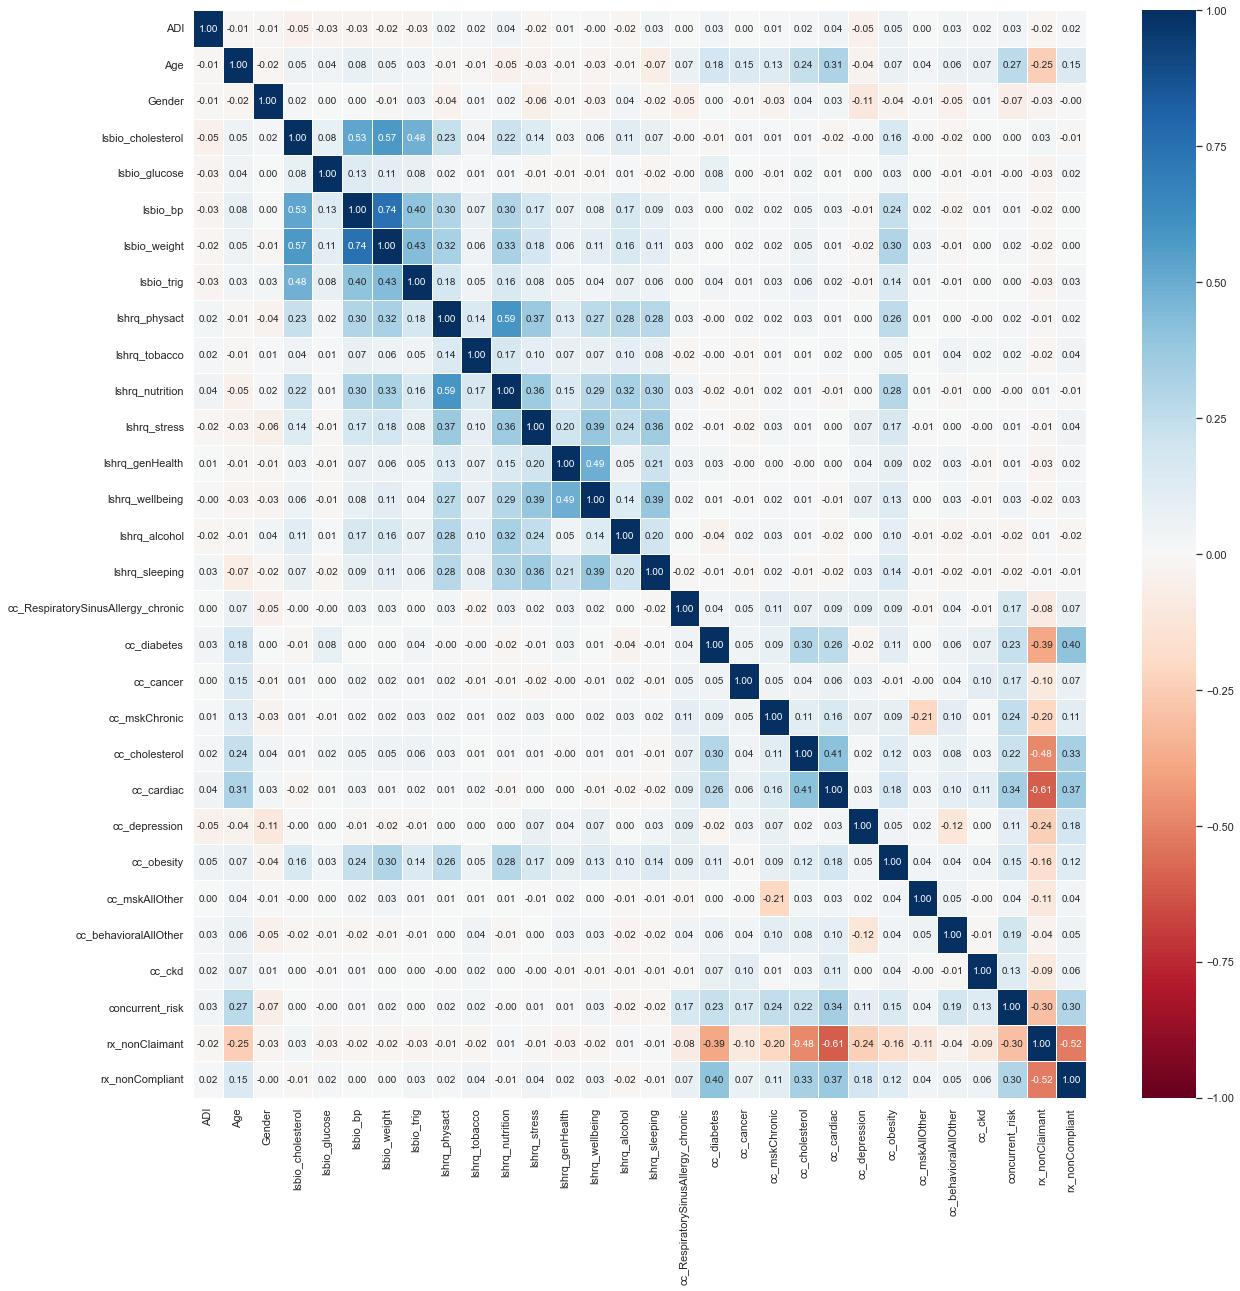

In [16]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_2020['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_2020[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(x.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

logreg.fit(x_train, y_train)

print('Intercept of Regression \t: b = ', logreg.intercept_)

coef_value = pd.DataFrame(list(zip(x.columns, logreg.coef_[0])), columns = ["Predictors", "Coefficients"])
print(coef_value)

y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [17]:
# check vif data

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_vif_constant = sm.add_constant(x_train)

vif_data = pd.DataFrame()
vif_data['Variable'] = x_vif_constant.columns
vif_data['VIF'] = [variance_inflation_factor(x_vif_constant.values, i) for i in range(x_vif_constant.shape[1])]

vif_data

,Variable,VIF
0,const,46.143101
1,ADI,1.018438
2,Age,1.192935
3,lsbio_cholesterol,1.723866
4,lsbio_glucose,1.031630
5,lsbio_bp,2.342291
6,lsbio_weight,2.665646
7,lsbio_trig,1.369013
8,lshrq_physact,1.705384
9,lshrq_tobacco,1.051652


In [18]:
import statsmodels.api as sm

x_with_constant = sm.add_constant(x)
model = sm.MNLogit(y, x_with_constant)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.446286
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:     performance_rating   No. Observations:                 5990
Model:                        MNLogit   Df Residuals:                     5928
Method:                           MLE   Df Model:                           60
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                 0.02829
Time:                        10:00:03   Log-Likelihood:                -2673.3
converged:                       True   LL-Null:                       -2751.1
Covariance Type:            nonrobust   LLR p-value:                 1.959e-10
              performance_rating=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  6.5412      0.779    

In [19]:
significant_variable_2020 = {}

p_value_dataframe = pd.DataFrame(result.pvalues)
p_value_dataframe = p_value_dataframe.rename(columns={0: 'rating3', 1: 'rating4'})
p_value_dataframe = p_value_dataframe.round(2)

significant_variable_2020['performance 3'] = p_value_dataframe[(p_value_dataframe['rating3'] < 0.1)].index.tolist()
significant_variable_2020['performance 4'] = p_value_dataframe[(p_value_dataframe['rating4'] < 0.1)].index.tolist()

print(significant_variable_2020)

{'performance 3': ['const', 'Age', 'lshrq_wellbeing', 'cc_depression', 'Gender_1'], 'performance 4': ['const', 'cc_depression', 'cc_mskAllOther', 'Gender_1']}


#### Compare significant variables

In [20]:
print('2018: {}'.format(significant_variable_2018))
print('2019: {}'.format(significant_variable_2019))
print('2020: {}'.format(significant_variable_2020))

2018: {'performance 3': ['const', 'ADI', 'Age', 'cc_depression', 'cc_mskAllOther', 'cc_ckd', 'concurrent_risk', 'Gender_1'], 'performance 4': ['const', 'lshrq_genHealth', 'lshrq_alcohol', 'cc_mskChronic', 'cc_depression', 'cc_mskAllOther', 'cc_ckd', 'concurrent_risk', 'Gender_1']}
2019: {'performance 3': ['const', 'lsbio_glucose', 'lshrq_nutrition', 'lshrq_sleeping', 'concurrent_risk', 'Gender_1'], 'performance 4': ['const', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lshrq_nutrition', 'lshrq_sleeping', 'cc_mskChronic', 'Gender_1']}
2020: {'performance 3': ['const', 'Age', 'lshrq_wellbeing', 'cc_depression', 'Gender_1'], 'performance 4': ['const', 'cc_depression', 'cc_mskAllOther', 'Gender_1']}


In [21]:
from collections import Counter

performance_3_lists = sum([d['performance 3'] for d in [significant_variable_2018, significant_variable_2019, significant_variable_2020]], [])
performance_4_lists = sum([d['performance 4'] for d in [significant_variable_2018, significant_variable_2019, significant_variable_2020]], [])

performance_3_counts = Counter(performance_3_lists)
performance_4_counts = Counter(performance_4_lists)

print(f"Performance 3 Counts: {performance_3_counts}")
print(f"Performance 4 Counts: {performance_4_counts}")

Performance 3 Counts: Counter({'const': 3, 'Gender_1': 3, 'Age': 2, 'cc_depression': 2, 'concurrent_risk': 2, 'ADI': 1, 'cc_mskAllOther': 1, 'cc_ckd': 1, 'lsbio_glucose': 1, 'lshrq_nutrition': 1, 'lshrq_sleeping': 1, 'lshrq_wellbeing': 1})
Performance 4 Counts: Counter({'const': 3, 'Gender_1': 3, 'cc_mskChronic': 2, 'cc_depression': 2, 'cc_mskAllOther': 2, 'lshrq_genHealth': 1, 'lshrq_alcohol': 1, 'cc_ckd': 1, 'concurrent_risk': 1, 'lsbio_cholesterol': 1, 'lsbio_glucose': 1, 'lsbio_bp': 1, 'lshrq_nutrition': 1, 'lshrq_sleeping': 1})


### Ordinal Logistic Regression

#### 2018

/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/4258341119.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/4258341119.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')


Train Set : (5436, 1) (5436, 30)
Test Set  : (1813, 1) (1813, 30)
Optimization terminated successfully.
         Current function value: 0.503579
         Iterations: 79
         Function evaluations: 82
         Gradient evaluations: 82


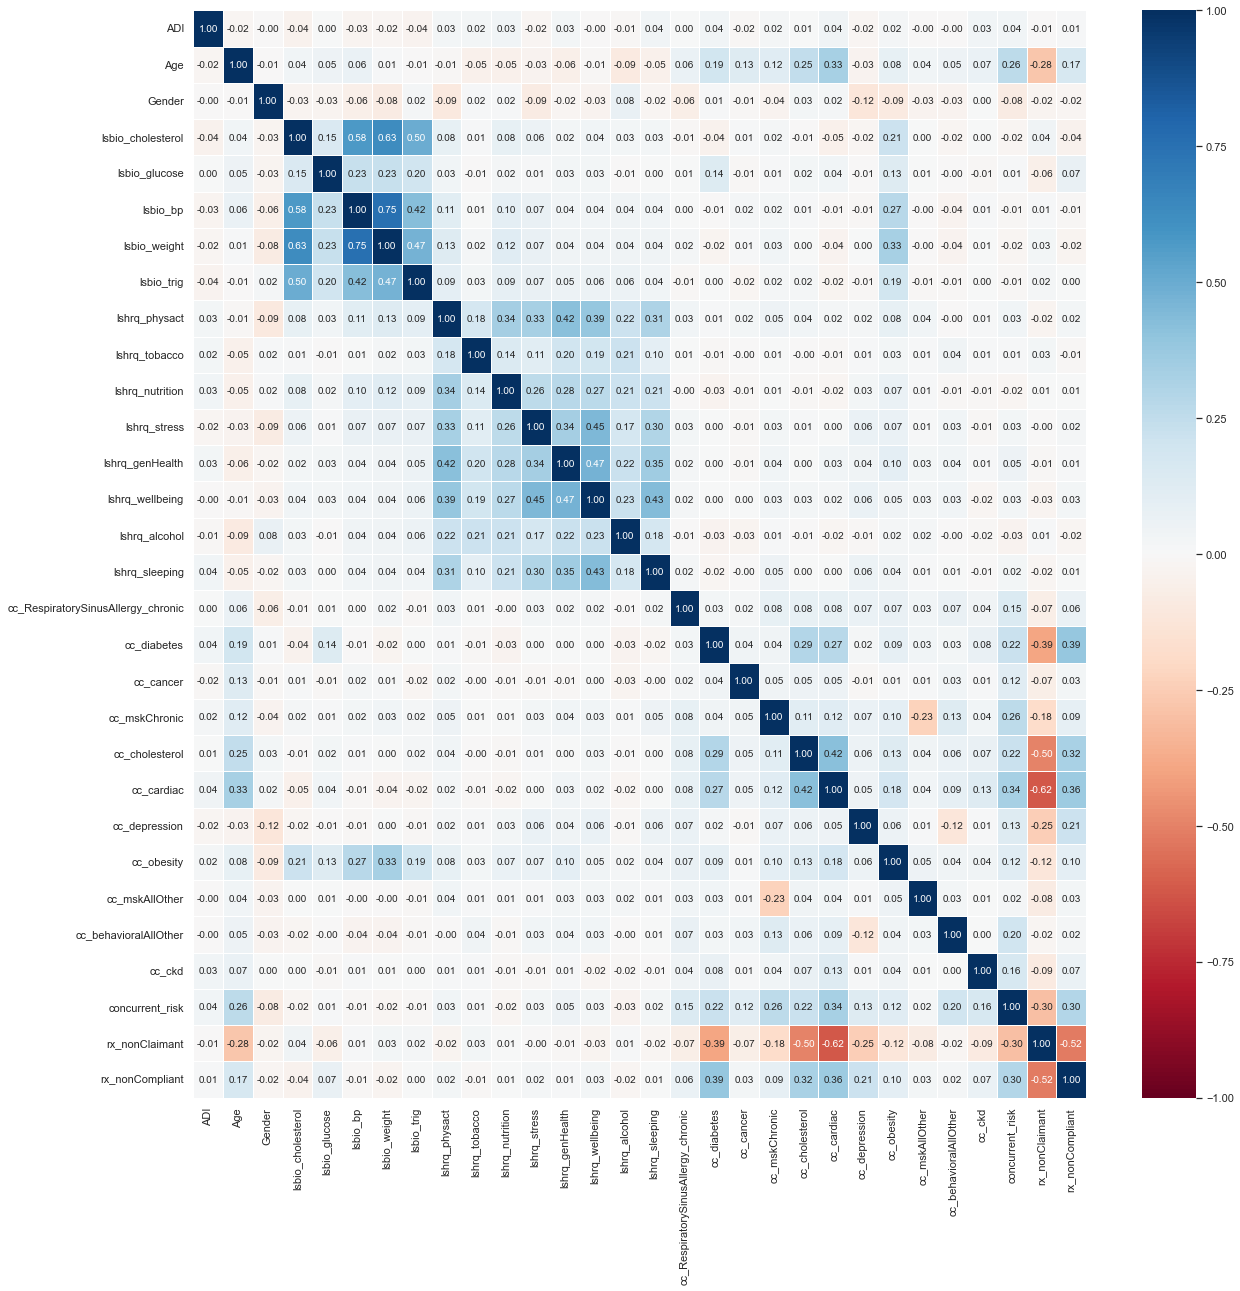

In [22]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_2018['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_2018[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(x.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

ord_reg = OrderedModel(y_train, x_train, distr='probit')
result = ord_reg.fit(method='bfgs')

In [23]:
print(result.summary())

                             OrderedModel Results                             
Dep. Variable:     performance_rating   Log-Likelihood:                -2737.5
Model:                   OrderedModel   AIC:                             5539.
Method:            Maximum Likelihood   BIC:                             5750.
Date:                Wed, 27 Mar 2024                                         
Time:                        10:00:20                                         
No. Observations:                5436                                         
Df Residuals:                    5404                                         
Df Model:                          30                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
ADI                                    0.0021      0.001      1.571      0.116     

In [24]:
from sklearn.metrics import mean_squared_error

y_train_pred = result.predict(x_train)
predicted_categories = y_train_pred.idxmax(axis=1)
train_mse = mean_squared_error(y_train, predicted_categories)

y_test_pred = result.predict(x_test)
predicted_categories = y_test_pred.idxmax(axis=1)
test_mse = mean_squared_error(y_test, predicted_categories)

print("Mean Squared Error (Train Dataset):", train_mse)
print("Mean Squared Error (Test Dataset):", test_mse)

Mean Squared Error (Train Dataset): 4.564385577630611
Mean Squared Error (Test Dataset): 4.526199669056812


In [25]:
significant_variable_o_2018 = {}

p_value_dataframe = pd.DataFrame(result.pvalues)
p_value_dataframe = p_value_dataframe.rename(columns={0: 'p-value'})
p_value_dataframe = p_value_dataframe.round(2)

significant_variable_o_2018['p-value'] = p_value_dataframe[(p_value_dataframe['p-value'] < 0.1)].index.tolist()

print(significant_variable_o_2018)

{'p-value': ['Age', 'lsbio_weight', 'lshrq_genHealth', 'lshrq_alcohol', 'cc_mskChronic', 'cc_mskAllOther', 'concurrent_risk', 'Gender_1', '2/3', '3/4']}


#### 2019

/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/2478925333.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/2478925333.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')


Train Set : (4788, 1) (4788, 30)
Test Set  : (1596, 1) (1596, 30)
Optimization terminated successfully.
         Current function value: 0.463813
         Iterations: 95
         Function evaluations: 97
         Gradient evaluations: 97


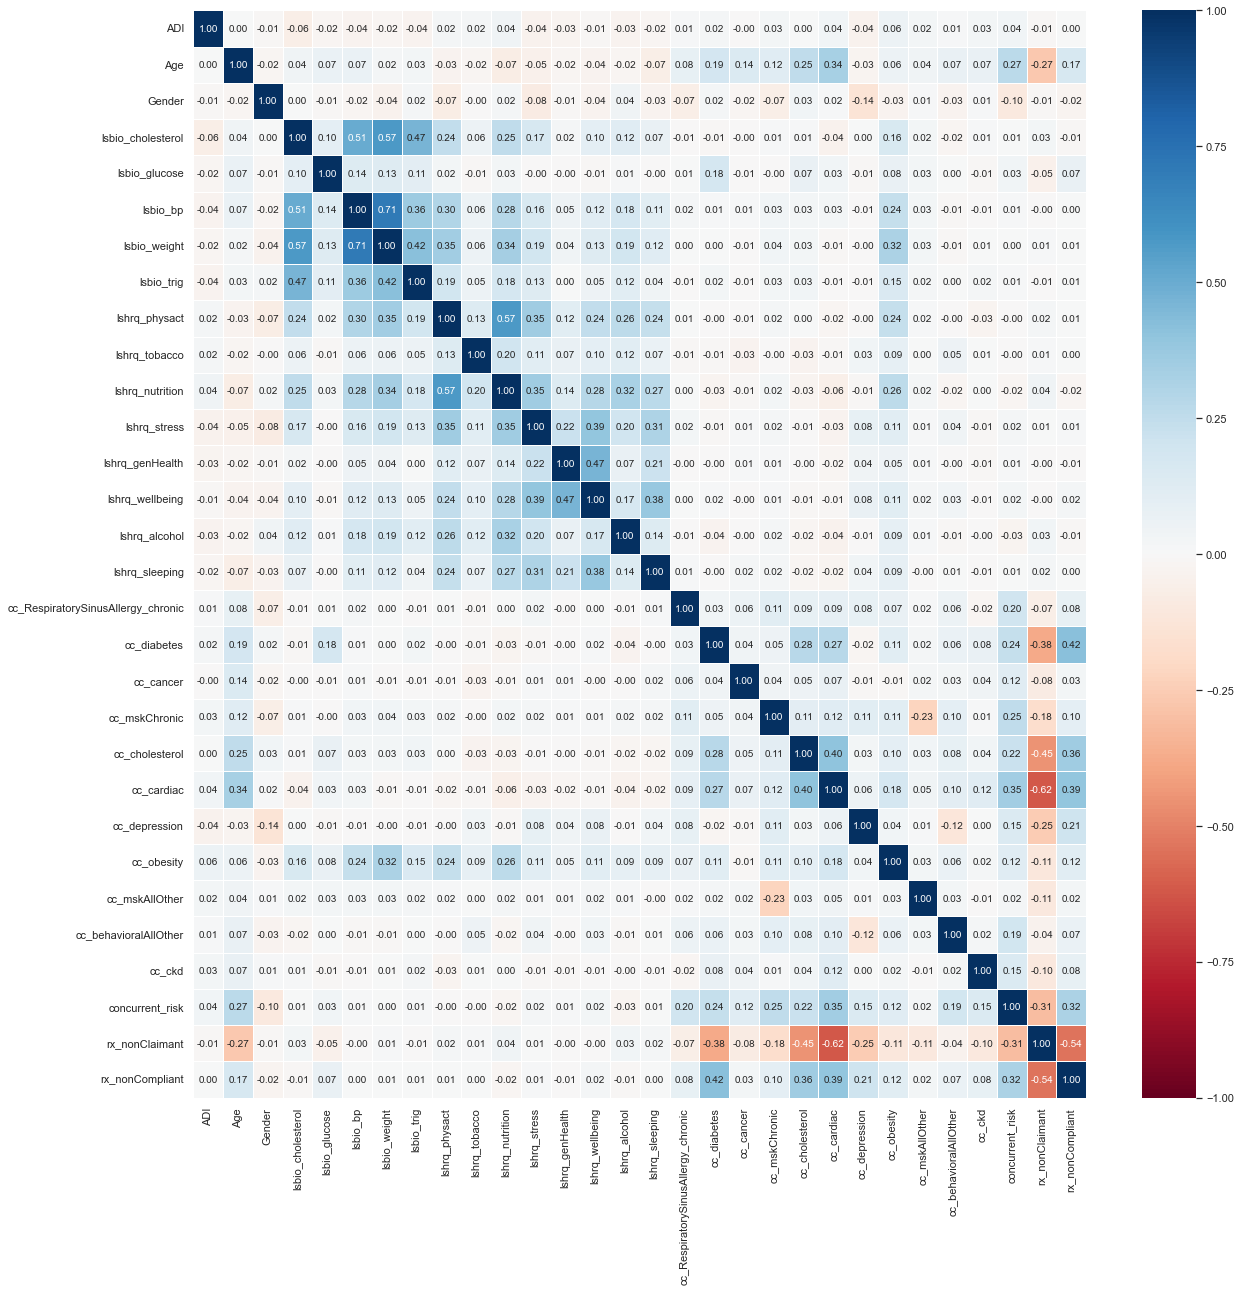

In [26]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_2019['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_2019[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(x.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

ord_reg = OrderedModel(y_train, x_train, distr='probit')
result = ord_reg.fit(method='bfgs')

In [27]:
print(result.summary())

                             OrderedModel Results                             
Dep. Variable:     performance_rating   Log-Likelihood:                -2220.7
Model:                   OrderedModel   AIC:                             4505.
Method:            Maximum Likelihood   BIC:                             4713.
Date:                Wed, 27 Mar 2024                                         
Time:                        10:00:29                                         
No. Observations:                4788                                         
Df Residuals:                    4756                                         
Df Model:                          30                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
ADI                                    0.0052      0.001      3.502      0.000     

In [28]:
from sklearn.metrics import mean_squared_error

y_train_pred = result.predict(x_train)
predicted_categories = y_train_pred.idxmax(axis=1)
train_mse = mean_squared_error(y_train, predicted_categories)

y_test_pred = result.predict(x_test)
predicted_categories = y_test_pred.idxmax(axis=1)
test_mse = mean_squared_error(y_test, predicted_categories)

print("Mean Squared Error (Train Dataset):", train_mse)
print("Mean Squared Error (Test Dataset):", test_mse)

Mean Squared Error (Train Dataset): 4.523600668337511
Mean Squared Error (Test Dataset): 4.521929824561403


In [29]:
significant_variable_o_2019 = {}

p_value_dataframe = pd.DataFrame(result.pvalues)
p_value_dataframe = p_value_dataframe.rename(columns={0: 'p-value'})
p_value_dataframe = p_value_dataframe.round(2)

significant_variable_o_2019['p-value'] = p_value_dataframe[(p_value_dataframe['p-value'] < 0.1)].index.tolist()

print(significant_variable_o_2019)

{'p-value': ['ADI', 'lsbio_cholesterol', 'lshrq_physact', 'lshrq_nutrition', 'lshrq_sleeping', 'cc_diabetes', 'cc_mskChronic', 'cc_cholesterol', 'rx_nonCompliant', 'Gender_1', '2/3', '3/4']}


#### 2020

/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/1930513062.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/1930513062.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')


Train Set : (4492, 1) (4492, 30)
Test Set  : (1498, 1) (1498, 30)
Optimization terminated successfully.
         Current function value: 0.448568
         Iterations: 84
         Function evaluations: 87
         Gradient evaluations: 87


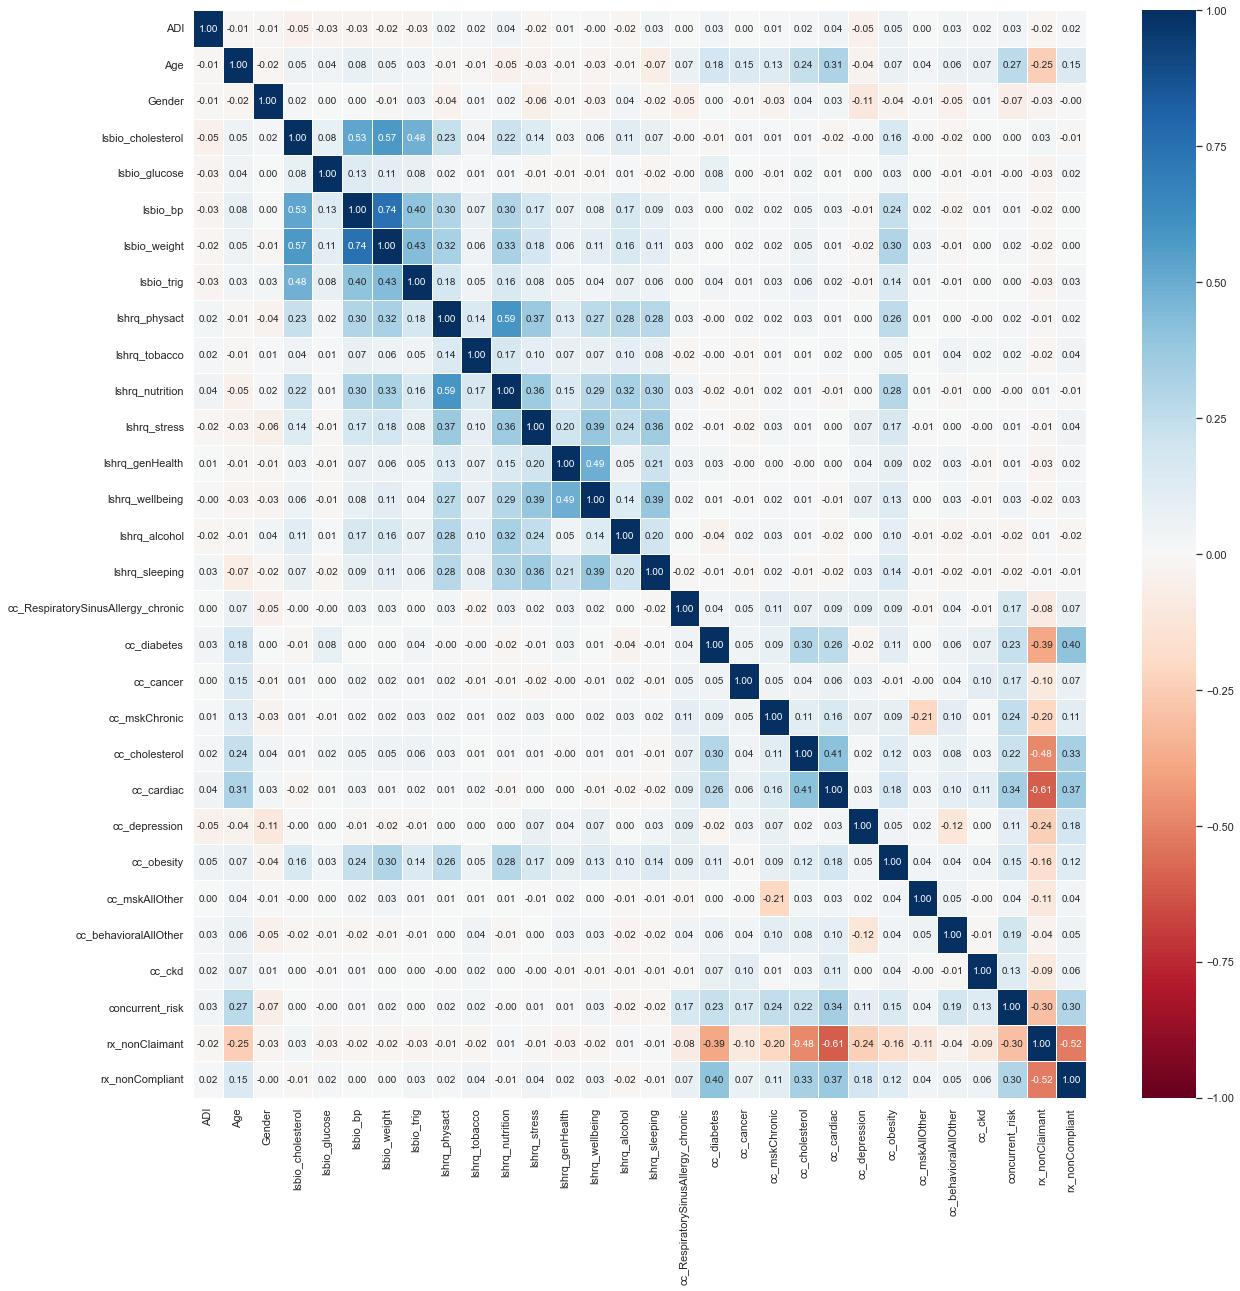

In [30]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_2020['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_2020[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(x.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

ord_reg = OrderedModel(y_train, x_train, distr='probit')
result = ord_reg.fit(method='bfgs')

In [31]:
print(result.summary())

                             OrderedModel Results                             
Dep. Variable:     performance_rating   Log-Likelihood:                -2015.0
Model:                   OrderedModel   AIC:                             4094.
Method:            Maximum Likelihood   BIC:                             4299.
Date:                Wed, 27 Mar 2024                                         
Time:                        10:00:38                                         
No. Observations:                4492                                         
Df Residuals:                    4460                                         
Df Model:                          30                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
ADI                                    0.0071      0.002      4.586      0.000     

In [32]:
from sklearn.metrics import mean_squared_error

y_train_pred = result.predict(x_train)
predicted_categories = y_train_pred.idxmax(axis=1)
train_mse = mean_squared_error(y_train, predicted_categories)

y_test_pred = result.predict(x_test)
predicted_categories = y_test_pred.idxmax(axis=1)
test_mse = mean_squared_error(y_test, predicted_categories)

print("Mean Squared Error (Train Dataset):", train_mse)
print("Mean Squared Error (Test Dataset):", test_mse)

Mean Squared Error (Train Dataset): 4.579252003561888
Mean Squared Error (Test Dataset): 4.6321762349799736


In [33]:
significant_variable_o_2020 = {}

p_value_dataframe = pd.DataFrame(result.pvalues)
p_value_dataframe = p_value_dataframe.rename(columns={0: 'p-value'})
p_value_dataframe = p_value_dataframe.round(2)

significant_variable_o_2020['p-value'] = p_value_dataframe[(p_value_dataframe['p-value'] < 0.1)].index.tolist()

print(significant_variable_o_2020)

{'p-value': ['ADI', 'Age', 'lsbio_cholesterol', 'lshrq_nutrition', 'cc_depression', 'cc_mskAllOther', 'cc_behavioralAllOther', 'Gender_1', '2/3', '3/4']}


#### Compare significant variables

In [34]:
print('2018: {}'.format(significant_variable_o_2018))
print('2019: {}'.format(significant_variable_o_2019))
print('2020: {}'.format(significant_variable_o_2020))

2018: {'p-value': ['Age', 'lsbio_weight', 'lshrq_genHealth', 'lshrq_alcohol', 'cc_mskChronic', 'cc_mskAllOther', 'concurrent_risk', 'Gender_1', '2/3', '3/4']}
2019: {'p-value': ['ADI', 'lsbio_cholesterol', 'lshrq_physact', 'lshrq_nutrition', 'lshrq_sleeping', 'cc_diabetes', 'cc_mskChronic', 'cc_cholesterol', 'rx_nonCompliant', 'Gender_1', '2/3', '3/4']}
2020: {'p-value': ['ADI', 'Age', 'lsbio_cholesterol', 'lshrq_nutrition', 'cc_depression', 'cc_mskAllOther', 'cc_behavioralAllOther', 'Gender_1', '2/3', '3/4']}


In [35]:
from collections import Counter

low_pvalues = sum([d['p-value'] for d in [significant_variable_o_2018, significant_variable_o_2019, significant_variable_o_2020]], [])

low_pvalues_count = Counter(low_pvalues)

print("Low p-value Counts: {}".format(low_pvalues_count))

Low p-value Counts: Counter({'Gender_1': 3, '2/3': 3, '3/4': 3, 'Age': 2, 'cc_mskChronic': 2, 'cc_mskAllOther': 2, 'ADI': 2, 'lsbio_cholesterol': 2, 'lshrq_nutrition': 2, 'lsbio_weight': 1, 'lshrq_genHealth': 1, 'lshrq_alcohol': 1, 'concurrent_risk': 1, 'lshrq_physact': 1, 'lshrq_sleeping': 1, 'cc_diabetes': 1, 'cc_cholesterol': 1, 'rx_nonCompliant': 1, 'cc_depression': 1, 'cc_behavioralAllOther': 1})


### Decision Tree Regressor

#### 2018

In [36]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_2018['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_2018[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

decisiontreemodel = DecisionTreeRegressor(max_depth=3)
result = decisiontreemodel.fit(x_train, y_train)

y_train_pred = decisiontreemodel.predict(x_train)
train_mse = mean_squared_error(y_train_pred, y_train)
y_test_pred = decisiontreemodel.predict(x_test)
test_mse = mean_squared_error(y_test_pred, y_test)

print("Mean Squared Error (Train Dataset):", train_mse)
print("Mean Squared Error (Test Dataset):", test_mse)

/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/999660366.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')


Train Set : (5436, 1) (5436, 30)
Test Set  : (1813, 1) (1813, 30)
Mean Squared Error (Train Dataset): 0.14058130892285703
Mean Squared Error (Test Dataset): 0.13982211473083306


/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/999660366.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')


In [37]:
significant_variable_dt_2018 = {}
significant_variable_dt_2018['significant_variables'] = []
fr = decisiontreemodel.feature_importances_ 
importance_dict = dict(zip(df.columns, fr))
for key in importance_dict:
    if importance_dict[key] > 0:
        significant_variable_dt_2018['significant_variables'].append(key)
        
print(significant_variable_dt_2018)

{'significant_variables': ['ADI', 'Age', 'lsbio_weight', 'cc_mskChronic']}


[Text(0.5, 0.875, 'ADI <= 14.5\nsquared_error = 0.142\nsamples = 5436\nvalue = 3.102'),
 Text(0.25, 0.625, 'Age <= 71.0\nsquared_error = 0.099\nsamples = 692\nvalue = 3.043'),
 Text(0.125, 0.375, 'Age <= 37.5\nsquared_error = 0.097\nsamples = 687\nvalue = 3.047'),
 Text(0.0625, 0.125, 'squared_error = 0.054\nsamples = 166\nvalue = 2.994'),
 Text(0.1875, 0.125, 'squared_error = 0.109\nsamples = 521\nvalue = 3.063'),
 Text(0.375, 0.375, 'ADI <= 9.0\nsquared_error = 0.24\nsamples = 5\nvalue = 2.6'),
 Text(0.3125, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 2.0'),
 Text(0.4375, 0.125, 'squared_error = 0.0\nsamples = 3\nvalue = 3.0'),
 Text(0.75, 0.625, 'Age <= 36.5\nsquared_error = 0.148\nsamples = 4744\nvalue = 3.11'),
 Text(0.625, 0.375, 'cc_diabetes <= 0.5\nsquared_error = 0.094\nsamples = 1191\nvalue = 3.072'),
 Text(0.5625, 0.125, 'squared_error = 0.093\nsamples = 1180\nvalue = 3.07'),
 Text(0.6875, 0.125, 'squared_error = 0.198\nsamples = 11\nvalue = 3.273'),
 Text(0.875, 0.375

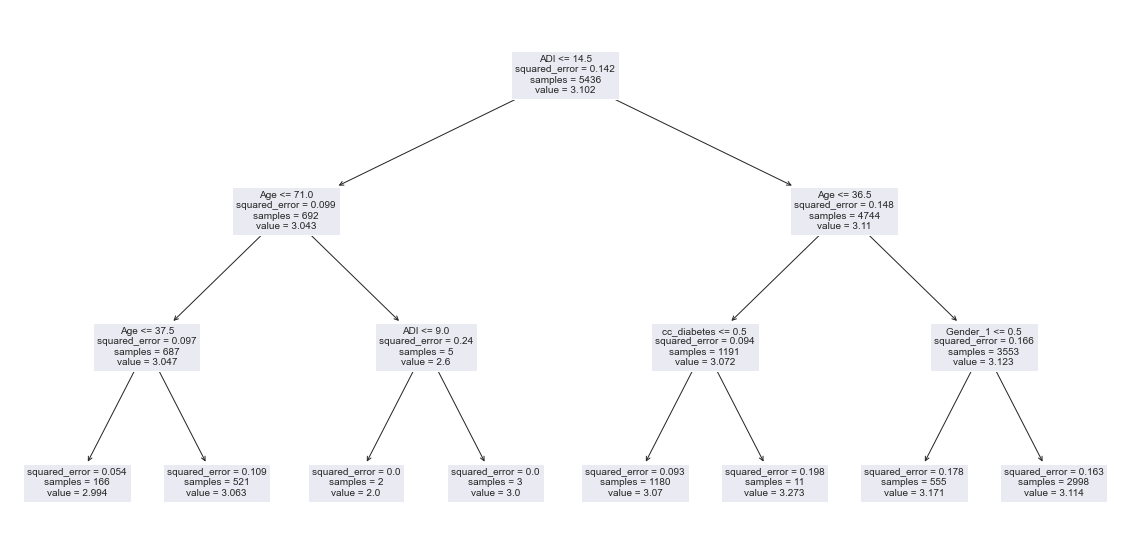

In [38]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.subplots(figsize=(20, 10)) 
tree.plot_tree(decisiontreemodel, fontsize=10, feature_names=x_train.columns)

#### 2019

In [39]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_2019['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_2019[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

decisiontreemodel = DecisionTreeRegressor(max_depth=3)
result = decisiontreemodel.fit(x_train, y_train)

y_train_pred = decisiontreemodel.predict(x_train)
train_mse = mean_squared_error(y_train_pred, y_train)
y_test_pred = decisiontreemodel.predict(x_test)
test_mse = mean_squared_error(y_test_pred, y_test)

print("Mean Squared Error (Train Dataset):", train_mse)
print("Mean Squared Error (Test Dataset):", test_mse)

Train Set : (4788, 1) (4788, 30)
Test Set  : (1596, 1) (1596, 30)
Mean Squared Error (Train Dataset): 0.1300185718365749
Mean Squared Error (Test Dataset): 0.12444869682676758


/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/2821825730.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/2821825730.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')


In [40]:
significant_variable_dt_2019 = {}
significant_variable_dt_2019['significant_variables'] = []
fr = decisiontreemodel.feature_importances_ 
importance_dict = dict(zip(df.columns, fr))
for key in importance_dict:
    if importance_dict[key] > 0:
        significant_variable_dt_2019['significant_variables'].append(key)
        
print(significant_variable_dt_2019)

{'significant_variables': ['ADI', 'Age', 'HRQParticipants', 'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_mskChronic']}


[Text(0.5, 0.875, 'Age <= 32.5\nsquared_error = 0.132\nsamples = 4788\nvalue = 3.098'),
 Text(0.25, 0.625, 'rx_nonClaimant <= 0.5\nsquared_error = 0.073\nsamples = 666\nvalue = 3.032'),
 Text(0.125, 0.375, 'Age <= 26.5\nsquared_error = 0.059\nsamples = 64\nvalue = 2.938'),
 Text(0.0625, 0.125, 'squared_error = 0.173\nsamples = 9\nvalue = 2.778'),
 Text(0.1875, 0.125, 'squared_error = 0.035\nsamples = 55\nvalue = 2.964'),
 Text(0.375, 0.375, 'lshrq_wellbeing <= 0.5\nsquared_error = 0.073\nsamples = 602\nvalue = 3.042'),
 Text(0.3125, 0.125, 'squared_error = 0.07\nsamples = 567\nvalue = 3.048'),
 Text(0.4375, 0.125, 'squared_error = 0.111\nsamples = 35\nvalue = 2.943'),
 Text(0.75, 0.625, 'ADI <= 14.5\nsquared_error = 0.141\nsamples = 4122\nvalue = 3.109'),
 Text(0.625, 0.375, 'concurrent_risk <= 9.5\nsquared_error = 0.103\nsamples = 514\nvalue = 3.047'),
 Text(0.5625, 0.125, 'squared_error = 0.099\nsamples = 508\nvalue = 3.041'),
 Text(0.6875, 0.125, 'squared_error = 0.25\nsamples = 6\n

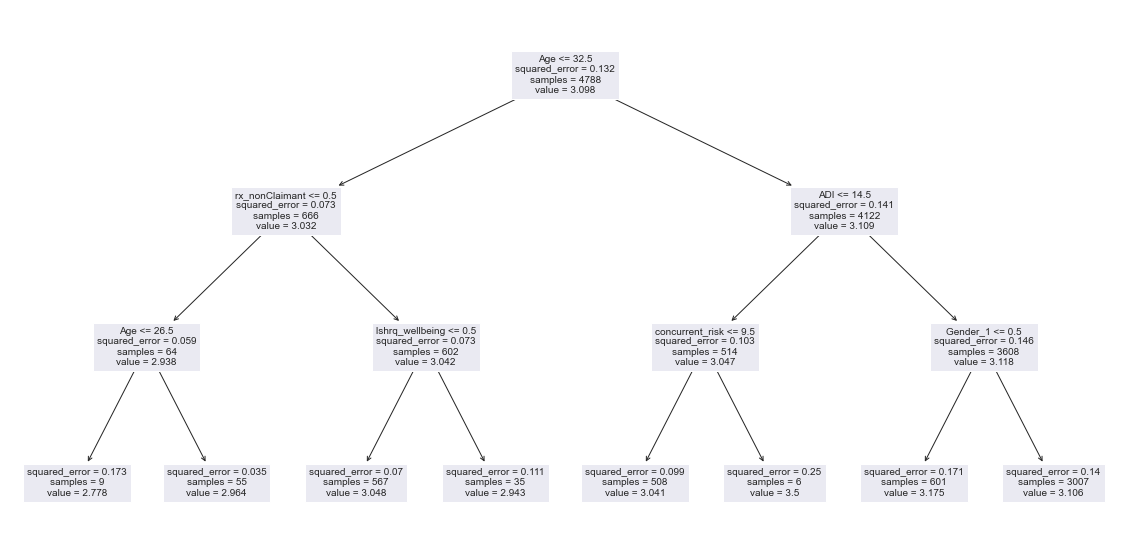

In [41]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.subplots(figsize=(20, 10)) 
tree.plot_tree(decisiontreemodel, fontsize=10, feature_names=x_train.columns)

#### 2020

In [42]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_2020['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_2020[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

decisiontreemodel = DecisionTreeRegressor(max_depth=3)
result = decisiontreemodel.fit(x_train, y_train)

y_train_pred = decisiontreemodel.predict(x_train)
train_mse = mean_squared_error(y_train_pred, y_train)
y_test_pred = decisiontreemodel.predict(x_test)
test_mse = mean_squared_error(y_test_pred, y_test)

print("Mean Squared Error (Train Dataset):", train_mse)
print("Mean Squared Error (Test Dataset):", test_mse)

Train Set : (4492, 1) (4492, 30)
Test Set  : (1498, 1) (1498, 30)
Mean Squared Error (Train Dataset): 0.12648404161189994
Mean Squared Error (Test Dataset): 0.13058592960164392


/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/770285336.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/770285336.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')


In [43]:
significant_variable_dt_2020 = {}
significant_variable_dt_2020['significant_variables'] = []
fr = decisiontreemodel.feature_importances_ 
importance_dict = dict(zip(df.columns, fr))
for key in importance_dict:
    if importance_dict[key] > 0:
        significant_variable_dt_2020['significant_variables'].append(key)
        
print(significant_variable_dt_2020)

{'significant_variables': ['ADI', 'Age', 'lshrq_genHealth', 'cc_mskChronic']}


[Text(0.5, 0.875, 'ADI <= 26.5\nsquared_error = 0.13\nsamples = 4492\nvalue = 3.11'),
 Text(0.25, 0.625, 'Age <= 61.5\nsquared_error = 0.102\nsamples = 2034\nvalue = 3.076'),
 Text(0.125, 0.375, 'Age <= 39.5\nsquared_error = 0.103\nsamples = 1894\nvalue = 3.084'),
 Text(0.0625, 0.125, 'squared_error = 0.069\nsamples = 602\nvalue = 3.033'),
 Text(0.1875, 0.125, 'squared_error = 0.117\nsamples = 1292\nvalue = 3.108'),
 Text(0.375, 0.375, 'ADI <= 4.0\nsquared_error = 0.077\nsamples = 140\nvalue = 2.964'),
 Text(0.3125, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(0.4375, 0.125, 'squared_error = 0.071\nsamples = 139\nvalue = 2.971'),
 Text(0.75, 0.625, 'Gender_1 <= 0.5\nsquared_error = 0.152\nsamples = 2458\nvalue = 3.138'),
 Text(0.625, 0.375, 'cc_obesity <= 0.5\nsquared_error = 0.19\nsamples = 442\nvalue = 3.213'),
 Text(0.5625, 0.125, 'squared_error = 0.135\nsamples = 248\nvalue = 3.149'),
 Text(0.6875, 0.125, 'squared_error = 0.249\nsamples = 194\nvalue = 3.294'),
 Te

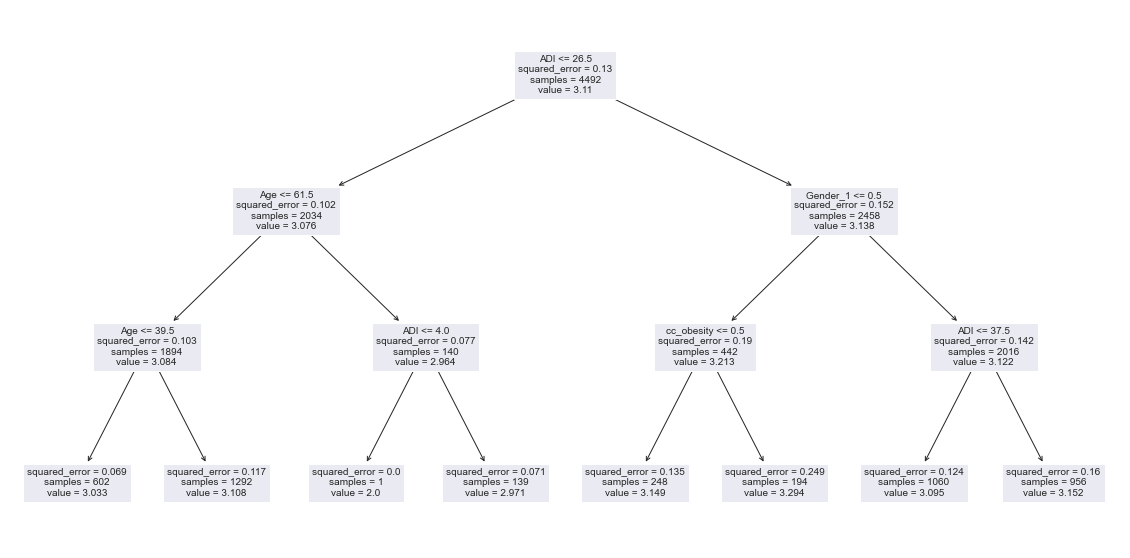

In [44]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.subplots(figsize=(20, 10)) 
tree.plot_tree(decisiontreemodel, fontsize=10, feature_names=x_train.columns)

#### Compare significant variables

In [45]:
print('2018: {}'.format(significant_variable_dt_2018))
print('2019: {}'.format(significant_variable_dt_2019))
print('2020: {}'.format(significant_variable_dt_2020))

2018: {'significant_variables': ['ADI', 'Age', 'lsbio_weight', 'cc_mskChronic']}
2019: {'significant_variables': ['ADI', 'Age', 'HRQParticipants', 'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_mskChronic']}
2020: {'significant_variables': ['ADI', 'Age', 'lshrq_genHealth', 'cc_mskChronic']}


In [46]:
from collections import Counter

sv = sum([d['significant_variables'] for d in [significant_variable_dt_2018, significant_variable_dt_2019, significant_variable_dt_2020]], [])

sv_count = Counter(sv)

print("Significant Variables Counts: {}".format(sv_count))

Significant Variables Counts: Counter({'ADI': 3, 'Age': 3, 'cc_mskChronic': 3, 'lsbio_weight': 1, 'HRQParticipants': 1, 'cc_RespiratorySinusAllergy_chronic': 1, 'cc_diabetes': 1, 'lshrq_genHealth': 1})


#### Everything as a whole

#### Logistic Regression

/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/1717512406.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/1717512406.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vecto

Train Set : (14717, 1) (14717, 30)
Test Set  : (4906, 1) (4906, 30)


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Intercept of Regression 	: b =  [-0.56762582  1.51764561 -0.95001979]
                            Predictors  Coefficients
0                                  ADI     -0.005516
1                                  Age     -0.015440
2                    lsbio_cholesterol      0.117487
3                        lsbio_glucose      0.024585
4                             lsbio_bp     -0.034772
5                         lsbio_weight     -0.042298
6                           lsbio_trig     -0.025480
7                        lshrq_physact     -0.118892
8                        lshrq_tobacco     -0.048581
9                      lshrq_nutrition     -0.205763
10                        lshrq_stress      0.032904
11                     lshrq_genHealth     -0.041509
12                     lshrq_wellbeing      0.059955
13                       lshrq_alcohol     -0.130884
14                      lshrq_sleeping      0.070548
15  cc_RespiratorySinusAllergy_chronic     -0.072396
16                         cc

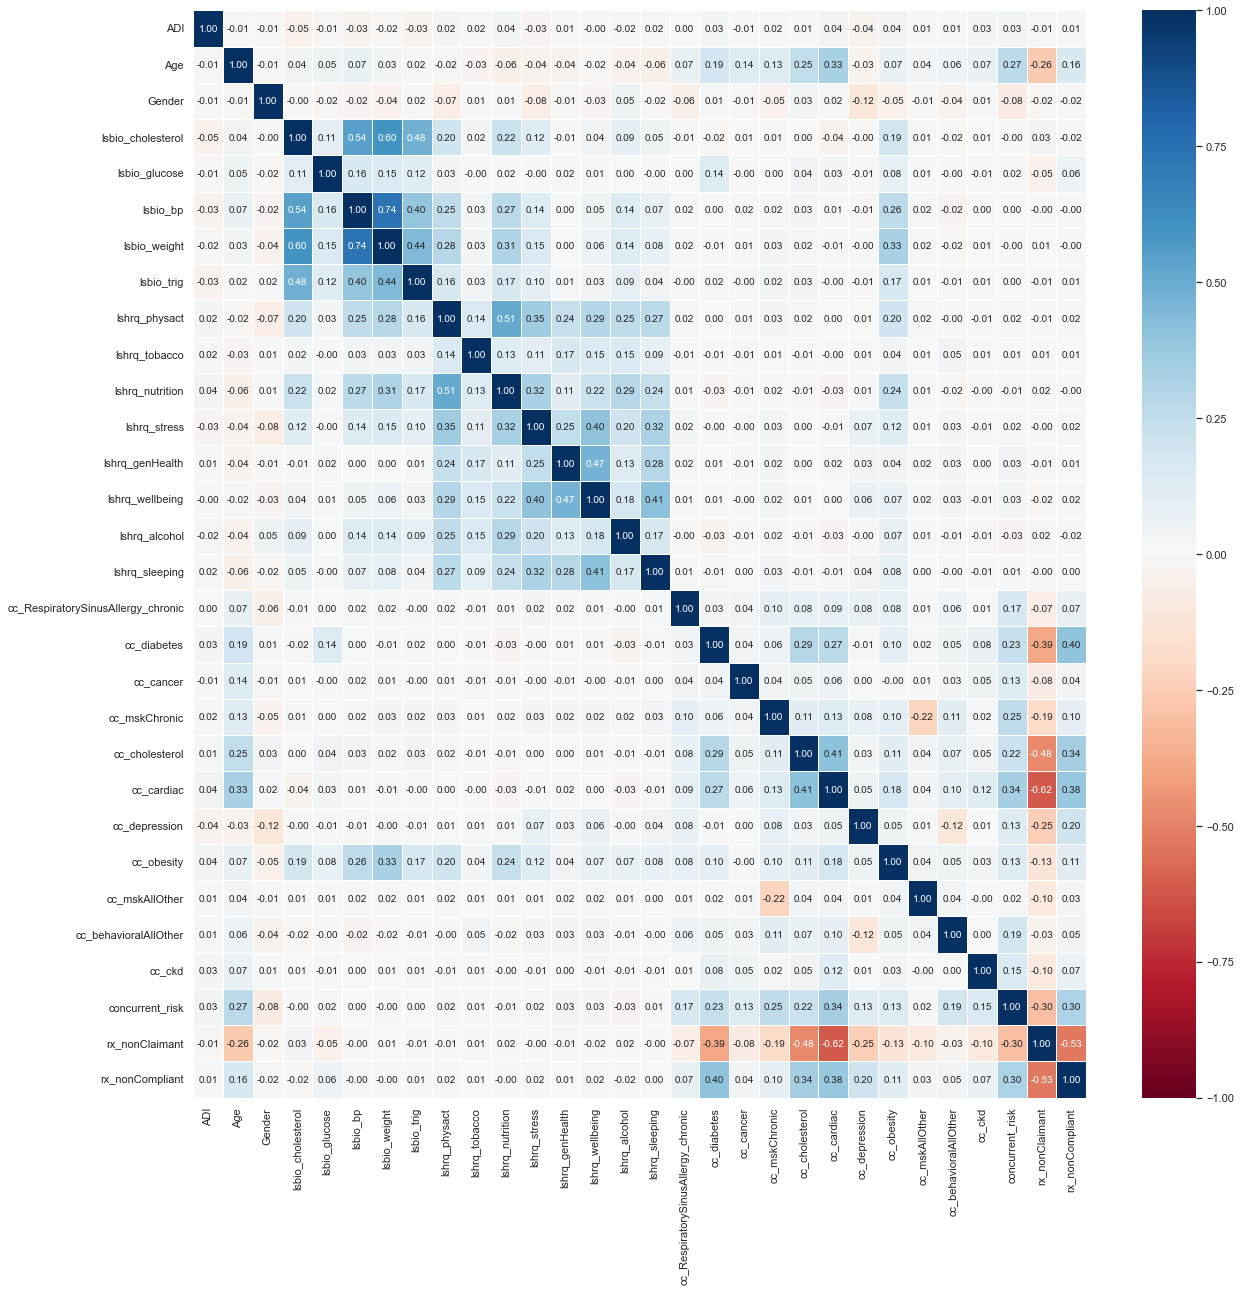

In [47]:
df_P = df.loc[(df.Subgroup=='Subgroup P')]

health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_P['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_P[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(x.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

logreg.fit(x_train, y_train)

print('Intercept of Regression \t: b = ', logreg.intercept_)

coef_value = pd.DataFrame(list(zip(x.columns, logreg.coef_[0])), columns = ["Predictors", "Coefficients"])
print(coef_value)

y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", logreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [48]:
# check vif data

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_vif_constant = sm.add_constant(x_train)

vif_data = pd.DataFrame()
vif_data['Variable'] = x_vif_constant.columns
vif_data['VIF'] = [variance_inflation_factor(x_vif_constant.values, i) for i in range(x_vif_constant.shape[1])]

vif_data

,Variable,VIF
0,const,45.610987
1,ADI,1.017758
2,Age,1.208838
3,lsbio_cholesterol,1.762519
4,lsbio_glucose,1.059394
5,lsbio_bp,2.310421
6,lsbio_weight,2.717194
7,lsbio_trig,1.394887
8,lshrq_physact,1.556328
9,lshrq_tobacco,1.065675


In [49]:
import statsmodels.api as sm

x_with_constant = sm.add_constant(x)
model = sm.MNLogit(y, x_with_constant)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.465129
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:     performance_rating   No. Observations:                19623
Model:                        MNLogit   Df Residuals:                    19561
Method:                           MLE   Df Model:                           60
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                 0.02079
Time:                        10:00:46   Log-Likelihood:                -9127.2
converged:                       True   LL-Null:                       -9321.0
Covariance Type:            nonrobust   LLR p-value:                 1.980e-49
              performance_rating=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  5.5719      0.354    

In [50]:
significant_variable_whole = {}

p_value_dataframe = pd.DataFrame(result.pvalues)
p_value_dataframe = p_value_dataframe.rename(columns={0: 'rating3', 1: 'rating4'})
p_value_dataframe = p_value_dataframe.round(2)

significant_variable_whole['performance 3'] = p_value_dataframe[(p_value_dataframe['rating3'] < 0.1)].index.tolist()
significant_variable_whole['performance 4'] = p_value_dataframe[(p_value_dataframe['rating4'] < 0.1)].index.tolist()

print('Performance 3: ', significant_variable_whole['performance 3'])
print('Performance 4: ', significant_variable_whole['performance 4'])

Performance 3:  ['const', 'ADI', 'Age', 'lshrq_nutrition', 'cc_cancer', 'cc_mskChronic', 'cc_depression', 'cc_mskAllOther', 'concurrent_risk', 'Gender_1']
Performance 4:  ['const', 'lsbio_cholesterol', 'lshrq_nutrition', 'lshrq_genHealth', 'lshrq_sleeping', 'cc_diabetes', 'cc_mskChronic', 'cc_depression', 'cc_mskAllOther', 'concurrent_risk', 'Gender_1']


#### Ordinal Logistic Regression

/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/549401062.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/549401062.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')


Train Set : (14717, 1) (14717, 30)
Test Set  : (4906, 1) (4906, 30)
Optimization terminated successfully.
         Current function value: 0.463302
         Iterations: 84
         Function evaluations: 86
         Gradient evaluations: 86


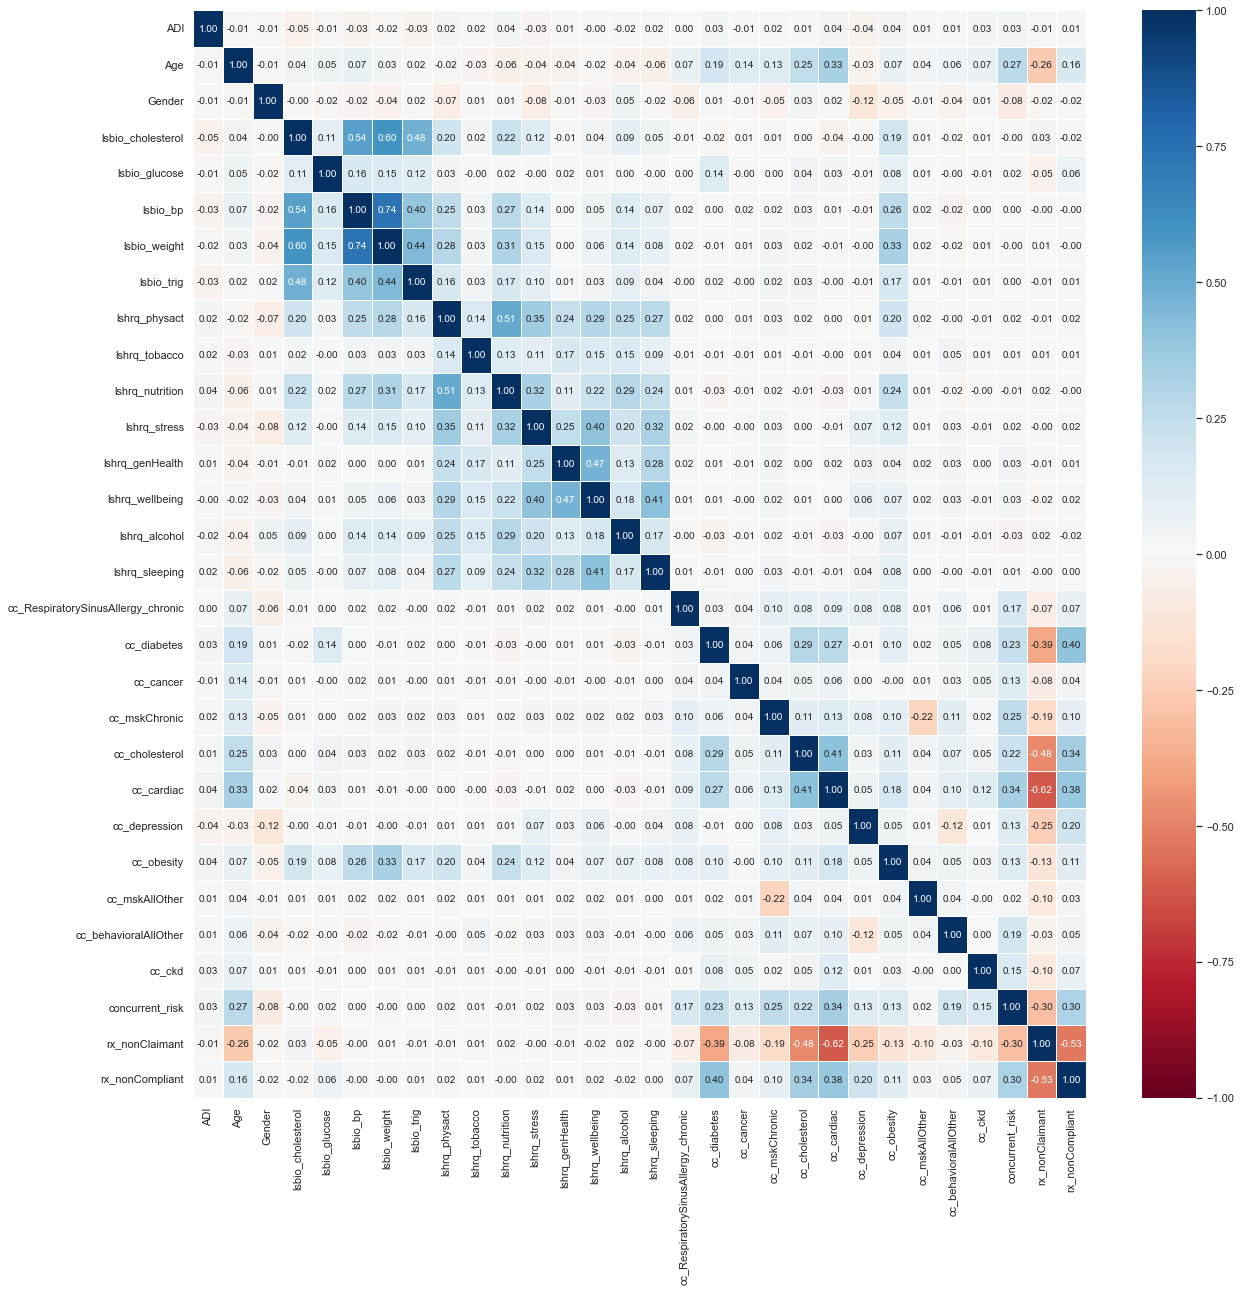

In [51]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_P['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_P[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(x.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 10}, cmap = "RdBu")

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

ord_reg = OrderedModel(y_train, x_train, distr='probit')
result = ord_reg.fit(method='bfgs')

In [52]:
print(result.summary())

                             OrderedModel Results                             
Dep. Variable:     performance_rating   Log-Likelihood:                -6818.4
Model:                   OrderedModel   AIC:                         1.370e+04
Method:            Maximum Likelihood   BIC:                         1.394e+04
Date:                Wed, 27 Mar 2024                                         
Time:                        10:01:07                                         
No. Observations:               14717                                         
Df Residuals:                   14685                                         
Df Model:                          30                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
ADI                                    0.0047      0.001      5.492      0.000     

In [53]:
from sklearn.metrics import mean_squared_error

y_train_pred = result.predict(x_train)
predicted_categories = y_train_pred.idxmax(axis=1)
train_mse = mean_squared_error(y_train, predicted_categories)

y_test_pred = result.predict(x_test)
predicted_categories = y_test_pred.idxmax(axis=1)
test_mse = mean_squared_error(y_test, predicted_categories)

print("Mean Squared Error (Train Dataset):", train_mse)
print("Mean Squared Error (Test Dataset):", test_mse)

Mean Squared Error (Train Dataset): 4.533804443840457
Mean Squared Error (Test Dataset): 4.622706889523033


In [54]:
significant_variable_o_whole = {}

p_value_dataframe = pd.DataFrame(result.pvalues)
p_value_dataframe = p_value_dataframe.rename(columns={0: 'p-value'})
p_value_dataframe = p_value_dataframe.round(2)

significant_variable_o_whole['p-value'] = p_value_dataframe[(p_value_dataframe['p-value'] < 0.1)].index.tolist()

print(significant_variable_o_whole)

{'p-value': ['ADI', 'Age', 'lsbio_cholesterol', 'lshrq_physact', 'lshrq_nutrition', 'lshrq_genHealth', 'lshrq_sleeping', 'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_mskChronic', 'cc_depression', 'cc_mskAllOther', 'cc_ckd', 'concurrent_risk', 'Gender_1', '2/3', '3/4']}


#### Decision Tree Regressor

In [55]:
health_factors = ['ADI', 'Age', 'Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                  'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                  'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                  'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

y = pd.DataFrame(df_P['performance_rating'])
y['performance_rating'] = y['performance_rating'].astype('category')

x = df_P[health_factors]

x.Gender = np.where(x.Gender == 'Male', '1', '0')

# use multinomial logistic regression as categorical y is not binary

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

decisiontreemodel = DecisionTreeRegressor(max_depth=3)
result = decisiontreemodel.fit(x_train, y_train)

y_train_pred = decisiontreemodel.predict(x_train)
train_mse = mean_squared_error(y_train_pred, y_train)
y_test_pred = decisiontreemodel.predict(x_test)
test_mse = mean_squared_error(y_test_pred, y_test)

print("Mean Squared Error (Train Dataset):", train_mse)
print("Mean Squared Error (Test Dataset):", test_mse)

Train Set : (14717, 1) (14717, 30)
Test Set  : (4906, 1) (4906, 30)
Mean Squared Error (Train Dataset): 0.13211184833805978
Mean Squared Error (Test Dataset): 0.13597317392164604


/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/3164742648.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Gender = np.where(x.Gender == 'Male', '1', '0')
/var/folders/xn/gnfdk6ks6733jfbyy3y35xyc0000gn/T/ipykernel_1549/3164742648.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[categorical_variables] = x[categorical_variables].astype('category')


In [56]:
significant_variable_dt_whole = {}
significant_variable_dt_whole['significant_variables'] = []
fr = decisiontreemodel.feature_importances_ 
importance_dict = dict(zip(df.columns, fr))
for key in importance_dict:
    if importance_dict[key] > 0:
        significant_variable_dt_whole['significant_variables'].append(key)
        
print(significant_variable_dt_whole)

{'significant_variables': ['ADI', 'Age', 'cc_mskChronic']}


[Text(0.5, 0.875, 'ADI <= 14.5\nsquared_error = 0.134\nsamples = 14717\nvalue = 3.104'),
 Text(0.25, 0.625, 'Age <= 71.5\nsquared_error = 0.089\nsamples = 1889\nvalue = 3.046'),
 Text(0.125, 0.375, 'Age <= 51.5\nsquared_error = 0.087\nsamples = 1874\nvalue = 3.048'),
 Text(0.0625, 0.125, 'squared_error = 0.067\nsamples = 1072\nvalue = 3.025'),
 Text(0.1875, 0.125, 'squared_error = 0.112\nsamples = 802\nvalue = 3.079'),
 Text(0.375, 0.375, 'ADI <= 9.0\nsquared_error = 0.196\nsamples = 15\nvalue = 2.733'),
 Text(0.3125, 0.125, 'squared_error = 0.25\nsamples = 8\nvalue = 2.5'),
 Text(0.4375, 0.125, 'squared_error = 0.0\nsamples = 7\nvalue = 3.0'),
 Text(0.75, 0.625, 'Age <= 37.5\nsquared_error = 0.14\nsamples = 12828\nvalue = 3.113'),
 Text(0.625, 0.375, 'ADI <= 38.5\nsquared_error = 0.096\nsamples = 3466\nvalue = 3.074'),
 Text(0.5625, 0.125, 'squared_error = 0.089\nsamples = 2569\nvalue = 3.06'),
 Text(0.6875, 0.125, 'squared_error = 0.117\nsamples = 897\nvalue = 3.111'),
 Text(0.875, 0

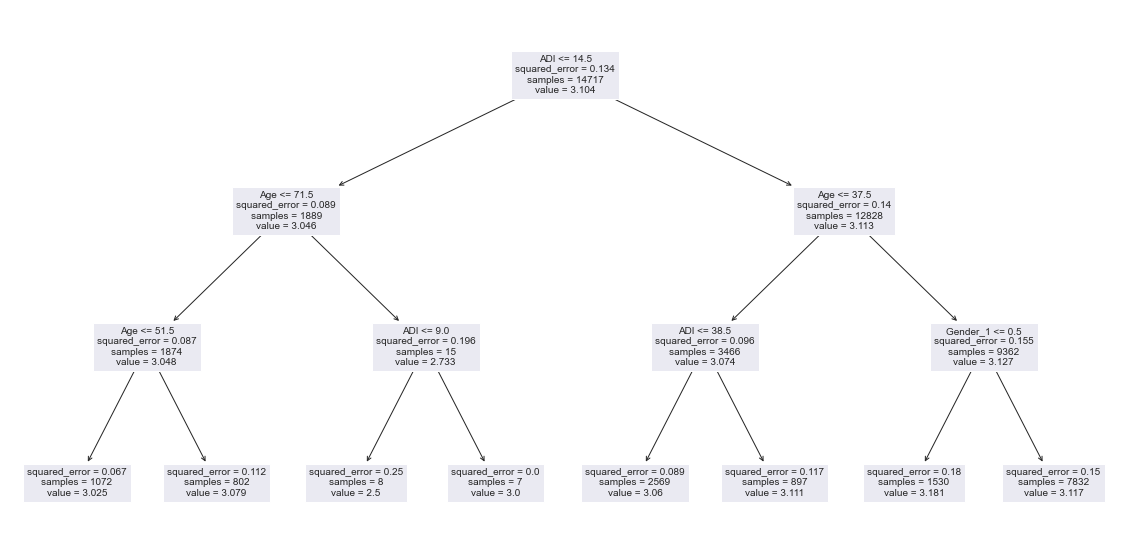

In [57]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.subplots(figsize=(20, 10)) 
tree.plot_tree(decisiontreemodel, fontsize=10, feature_names=x_train.columns)

### Health factor to Heat factors

### Logistic Regression

#### 2018

In [58]:
dependent_variables = ['cc_RespiratorySinusAllergy_chronic', 'cc_mskChronic', 'lshrq_nutrition']
x = df_2018[['extreme_heat_2018', 'extreme_heat_2019', 'extreme_heat_2020', 'wildfire_potential_2018', 'wildfire_potential_2019', 'wildfire_potential_2019.1']]
print('Multinomial Logistic Regression')
print('-----------------------------------------------------------------')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

for variable in dependent_variables:
    y = pd.DataFrame(df_2018[variable])
    y[variable] = y[variable].astype('category')

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

    print(f'Dependent Variable: {variable}')
    print("Train Set :", y_train.shape, x_train.shape)
    print("Test Set  :", y_test.shape, x_test.shape)

    logmodel = LogisticRegression()

    logmodel.fit(x_train, y_train)

    print('Intercept of Regression \t: b = ', logmodel.intercept_)

    # coef_value = pd.DataFrame(list(zip(x.columns, logreg.coef_[0])), columns = ["Predictors", "Coefficients"])
    # print(coef_value)
    # print()

    y_train_pred = logmodel.predict(x_train)
    y_test_pred = logmodel.predict(x_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", logmodel.score(x_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", logmodel.score(x_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

    x_with_constant = sm.add_constant(x_train)
    model = sm.Logit(y_train, x_with_constant)
    result = model.fit()

    print(result.summary())
    print('-----------------------------------------------------------------')

Multinomial Logistic Regression
-----------------------------------------------------------------
Dependent Variable: cc_RespiratorySinusAllergy_chronic
Train Set : (5436, 1) (5436, 6)
Test Set  : (1813, 1) (1813, 6)
Intercept of Regression 	: b =  [-4.07271192]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9302796173657101
Mean Squared Error (MSE) 	: 0.06972038263428992

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9321566464423607
Mean Squared Error (MSE) 	: 0.06784335355763928
Optimization terminated successfully.
         Current function value: 0.251825
         Iterations 7
                                   Logit Regression Results                                   
Dep. Variable:     cc_RespiratorySinusAllergy_chronic   No. Observations:                 5436
Model:                                          Logit   Df Residuals:                     5429
Method:                                           MLE   Df Model:               

/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Explained Variance (R^2) 	: 0.8858246001103144
Mean Squared Error (MSE) 	: 0.1141753998896856
Optimization terminated successfully.
         Current function value: 0.341113
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        lshrq_nutrition   No. Observations:                 5436
Model:                          Logit   Df Residuals:                     5429
Method:                           MLE   Df Model:                            6
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                0.001138
Time:                        10:01:08   Log-Likelihood:                -1854.3
converged:                       True   LL-Null:                       -1856.4
Covariance Type:            nonrobust   LLR p-value:                    0.6461
                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

#### Whole dataset (Subgroup P)

In [59]:
dependent_variables = ['cc_RespiratorySinusAllergy_chronic', 'cc_mskChronic', 'lshrq_nutrition']
x = df_P[['extreme_heat_2018', 'extreme_heat_2019', 'extreme_heat_2020', 'wildfire_potential_2018', 'wildfire_potential_2019', 'wildfire_potential_2019.1']]
print('Multinomial Logistic Regression')
print('-----------------------------------------------------------------')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

for variable in dependent_variables:
    y = pd.DataFrame(df_P[variable])
    y[variable] = y[variable].astype('category')

    # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

    print(f'Dependent Variable: {variable}')
    # print("Train Set :", y_train.shape, x_train.shape)
    # print("Test Set  :", y_test.shape, x_test.shape)

    logmodel = LogisticRegression()

    logmodel.fit(x, y)

    print('Intercept of Regression \t: b = ', logmodel.intercept_)

    # coef_value = pd.DataFrame(list(zip(x.columns, logreg.coef_[0])), columns = ["Predictors", "Coefficients"])
    # print(coef_value)
    # print()

    y_pred = logmodel.predict(x)
    # y_test_pred = logmodel.predict(x_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", logmodel.score(x, y))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y, y_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    # print("Goodness of Fit of Model \tTest Dataset")
    # print("Explained Variance (R^2) \t:", logmodel.score(x_test, y_test))
    # print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

    x_with_constant = sm.add_constant(x)
    model = sm.Logit(y, x_with_constant)
    result = model.fit()

    print(result.summary())
    print('-----------------------------------------------------------------')

Multinomial Logistic Regression
-----------------------------------------------------------------
Dependent Variable: cc_RespiratorySinusAllergy_chronic
Intercept of Regression 	: b =  [-3.3362787]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9284513071395811
Mean Squared Error (MSE) 	: 0.0715486928604189

Optimization terminated successfully.
         Current function value: 0.257354
         Iterations 7
                                   Logit Regression Results                                   
Dep. Variable:     cc_RespiratorySinusAllergy_chronic   No. Observations:                19623
Model:                                          Logit   Df Residuals:                    19616
Method:                                           MLE   Df Model:                            6
Date:                                Wed, 27 Mar 2024   Pseudo R-squ.:                0.001060
Time:                                        10:01:08   Log-Likelihood:                -50

/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7322020078479335
Mean Squared Error (MSE) 	: 0.26779799215206646

Optimization terminated successfully.
         Current function value: 0.580801
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          cc_mskChronic   No. Observations:                19623
Model:                          Logit   Df Residuals:                    19616
Method:                           MLE   Df Model:                            6
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:               0.0004398
Time:                        10:01:09   Log-Likelihood:                -11397.
converged:                       True   LL-Null:                       -11402.
Covariance Type:            nonrobust   LLR p-value:                    0.1234
                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------

/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### SVMs

In [60]:
dependent_variables = ['cc_RespiratorySinusAllergy_chronic', 'cc_mskChronic', 'lshrq_nutrition']
x = df_P[['extreme_heat_2018', 'extreme_heat_2019', 'extreme_heat_2020', 'wildfire_potential_2018', 'wildfire_potential_2019', 'wildfire_potential_2019.1']]
print('SVM')
print('-----------------------------------------------------------------')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn import svm
from sklearn import metrics

for variable in dependent_variables:
    y = pd.DataFrame(df_P[variable])
    y[variable] = y[variable].astype('category')

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

    print(f'Dependent Variable: {variable}')
    print("Train Set :", y_train.shape, x_train.shape)
    print("Test Set  :", y_test.shape, x_test.shape)

    clf = svm.SVC(kernel='linear')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Precision:",metrics.precision_score(y_test, y_pred))
    print("Recall:",metrics.recall_score(y_test, y_pred))
    print('-----------------------------------------------------------------')

SVM

/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



-----------------------------------------------------------------
Dependent Variable: cc_RespiratorySinusAllergy_chronic
Train Set : (14717, 1) (14717, 6)
Test Set  : (4906, 1) (4906, 6)
Accuracy: 0.9315124337545863
Precision: 0.0
Recall: 0.0
-----------------------------------------------------------------
Dependent Variable: cc_mskChronic
Train Set : (14717, 1) (14717, 6)
Test Set  : (4906, 1) (4906, 6)


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7258459029759479
Precision: 0.0
Recall: 0.0
-----------------------------------------------------------------
Dependent Variable: lshrq_nutrition
Train Set : (14717, 1) (14717, 6)
Test Set  : (4906, 1) (4906, 6)


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7594781899714635
Precision: 0.0
Recall: 0.0
-----------------------------------------------------------------


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [61]:
dependent_variables = ['cc_RespiratorySinusAllergy_chronic', 'cc_mskChronic', 'lshrq_nutrition']
x = df_P[['extreme_heat_2018', 'extreme_heat_2019', 'extreme_heat_2020', 'wildfire_potential_2018', 'wildfire_potential_2019', 'wildfire_potential_2019.1']]
print('SVM')
print('-----------------------------------------------------------------')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn import svm
from sklearn import metrics

for variable in dependent_variables:
    y = pd.DataFrame(df_P[variable])
    y[variable] = y[variable].astype('category')

    # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

    print(f'Dependent Variable: {variable}')
    # print("Train Set :", y_train.shape, x_train.shape)
    # print("Test Set  :", y_test.shape, x_test.shape)

    clf = svm.SVC(kernel='linear')
    clf.fit(x, y)
    y_pred = clf.predict(x)

    print("Accuracy:",metrics.accuracy_score(y, y_pred))
    print("Precision:",metrics.precision_score(y, y_pred))
    print("Recall:",metrics.recall_score(y, y_pred))
    print('-----------------------------------------------------------------')

SVM
-----------------------------------------------------------------
Dependent Variable: cc_RespiratorySinusAllergy_chronic


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9284513071395811
Precision: 0.0
Recall: 0.0
-----------------------------------------------------------------
Dependent Variable: cc_mskChronic


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7322020078479335
Precision: 0.0
Recall: 0.0
-----------------------------------------------------------------
Dependent Variable: lshrq_nutrition


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7648677572236661
Precision: 0.0
Recall: 0.0
-----------------------------------------------------------------


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Forecasting

#### cc_RespiratorySinusAllergy_chronic

#### Logistic Regression

In [62]:
y = pd.DataFrame(df_P['cc_RespiratorySinusAllergy_chronic'])
y['cc_RespiratorySinusAllergy_chronic'] = y['cc_RespiratorySinusAllergy_chronic'].astype('category')

dependent_variable = 'extreme_heat_2018'

x = df_P[[dependent_variable]]

logmodel = LogisticRegression()

logmodel.fit(x, y)

print('Intercept of Regression \t: b = ', logmodel.intercept_)

y_pred = logmodel.predict(x)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", logmodel.score(x, y))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y, y_pred))
print()

x_with_constant = sm.add_constant(x)
model = sm.Logit(y, x_with_constant)
result = model.fit()

print(result.summary())

Intercept of Regression 	: b =  [-2.61912188]
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9284513071395811
Mean Squared Error (MSE) 	: 0.0715486928604189

Optimization terminated successfully.
         Current function value: 0.257568
         Iterations 7
                                   Logit Regression Results                                   
Dep. Variable:     cc_RespiratorySinusAllergy_chronic   No. Observations:                19623
Model:                                          Logit   Df Residuals:                    19621
Method:                                           MLE   Df Model:                            1
Date:                                Wed, 27 Mar 2024   Pseudo R-squ.:               0.0002279
Time:                                        10:06:34   Log-Likelihood:                -5054.3
converged:                                       True   LL-Null:                       -5055.4
Covariance Type:                            nonrobus

/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
predictors=['extreme_heat_ssp245_2035', 'extreme_heat_ssp245_2045', 
            'extreme_heat_ssp585_2025', 'extreme_heat_ssp585_2035', 
            'extreme_heat_ssp585_2045']

for predictor in predictors:
    x_pred = pd.DataFrame(df_P[predictor])
    new_column_names = {predictor: dependent_variable}
    x_pred = x_pred.rename(columns=new_column_names)    
    y_pred = logmodel.predict(x_pred)
    
    y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = y.index)
    predicted_df = pd.concat([x_pred[dependent_variable], y_pred], axis = 1)

    # print(predicted_df)
    print('Total counts: {}'.format(predicted_df['PredTotal'].value_counts()))

Total counts: PredTotal
0    19623
Name: count, dtype: int64
Total counts: PredTotal
0    19623
Name: count, dtype: int64
Total counts: PredTotal
0    19623
Name: count, dtype: int64
Total counts: PredTotal
0    19623
Name: count, dtype: int64
Total counts: PredTotal
0    19623
Name: count, dtype: int64


#### Random oversampling

In [64]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
from sklearn.metrics import classification_report

print(y.value_counts())

ros = RandomOverSampler(random_state=42)
x_ros, y_ros= ros.fit_resample(x, y)

print(y_ros.value_counts())

logmodel = LogisticRegression()
logmodel.fit(x_ros, y_ros)
y_ros_pred = logmodel.predict(x_ros)

print(classification_report(y_ros, y_ros_pred))

print("Accuracy:",metrics.accuracy_score(y_ros, y_ros_pred))
print("Precision:",metrics.precision_score(y_ros, y_ros_pred))
print("Recall:",metrics.recall_score(y_ros, y_ros_pred))

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                     18219
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.50      0.54      0.52     18219
           1       0.50      0.46      0.47     18219

    accuracy                           0.50     36438
   macro avg       0.50      0.50      0.49     36438
weighted avg       0.50      0.50      0.49     36438

Accuracy: 0.495718755145727
Precision: 0.49534717251252686
Recall: 0.45578791371644983


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
predictors=['extreme_heat_ssp245_2035', 'extreme_heat_ssp245_2045', 
            'extreme_heat_ssp585_2025', 'extreme_heat_ssp585_2035', 
            'extreme_heat_ssp585_2045']

for predictor in predictors:
    print(f'Predictor: {predictor}')
    x_pred = pd.DataFrame(df_P[predictor])
    new_column_names = {predictor: dependent_variable}
    x_pred = x_pred.rename(columns=new_column_names)    
    y_pred = logmodel.predict(x_pred)
    
    y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = y.index)
    predicted_df = pd.concat([x_pred[dependent_variable], y_pred], axis = 1)

    # print(predicted_df)
    print('Total counts: {}'.format(predicted_df['PredTotal'].value_counts()))

Predictor: extreme_heat_ssp245_2035
Total counts: PredTotal
1    19494
0      129
Name: count, dtype: int64
Predictor: extreme_heat_ssp245_2045
Total counts: PredTotal
1    19590
0       33
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2025
Total counts: PredTotal
1    19345
0      278
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2035
Total counts: PredTotal
1    19539
0       84
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2045
Total counts: PredTotal
1    19590
0       33
Name: count, dtype: int64


#### SVMs

In [66]:
variable = 'cc_RespiratorySinusAllergy_chronic'

y = pd.DataFrame(df_P['cc_RespiratorySinusAllergy_chronic'])
y['cc_RespiratorySinusAllergy_chronic'] = y['cc_RespiratorySinusAllergy_chronic'].astype('category')

dependent_variable = 'extreme_heat_2018'

x = df_P[[dependent_variable]]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print(f'Dependent Variable: {dependent_variable}')
# print("Train Set :", y_train.shape, x_train.shape)
# print("Test Set  :", y_test.shape, x_test.shape)

clf = svm.SVC(kernel='linear')
clf.fit(x, y)
y_pred = clf.predict(x)

print(classification_report(y, y_pred))

print("Accuracy:",metrics.accuracy_score(y, y_pred))
print("Precision:",metrics.precision_score(y, y_pred))
print("Recall:",metrics.recall_score(y, y_pred))

Dependent Variable: extreme_heat_2018


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.93      1.00      0.96     18219
           1       0.00      0.00      0.00      1404

    accuracy                           0.93     19623
   macro avg       0.46      0.50      0.48     19623
weighted avg       0.86      0.93      0.89     19623

Accuracy: 0.9284513071395811
Precision: 0.0
Recall: 0.0


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [67]:
predictors=['extreme_heat_ssp245_2035', 'extreme_heat_ssp245_2045', 
            'extreme_heat_ssp585_2025', 'extreme_heat_ssp585_2035', 
            'extreme_heat_ssp585_2045']

for predictor in predictors:
    print(f'Predictor: {predictor}')
    x_pred = pd.DataFrame(df_P[predictor])
    new_column_names = {predictor: dependent_variable}
    x_pred = x_pred.rename(columns=new_column_names)    
    y_pred = clf.predict(x_pred)
    
    y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = y.index)
    predicted_df = pd.concat([x_pred[dependent_variable], y_pred], axis = 1)

    # print(predicted_df)
    print('Total counts: {}'.format(predicted_df['PredTotal'].value_counts()))

Predictor: extreme_heat_ssp245_2035
Total counts: PredTotal
0    19623
Name: count, dtype: int64
Predictor: extreme_heat_ssp245_2045
Total counts: PredTotal
0    19623
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2025
Total counts: PredTotal
0    19623
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2035
Total counts: PredTotal
0    19623
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2045
Total counts: PredTotal
0    19623
Name: count, dtype: int64


#### Random oversampling

In [68]:
# !pip install imblearn

In [69]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
from sklearn.metrics import classification_report

print(y.value_counts())

ros = RandomOverSampler(random_state=42)
x_ros, y_ros= ros.fit_resample(x, y)

print(y_ros.value_counts())

clf = svm.SVC(kernel='linear')
clf.fit(x_ros, y_ros)
y_ros_pred = clf.predict(x_ros)

print(classification_report(y_ros, y_ros_pred))

print("Accuracy:",metrics.accuracy_score(y_ros, y_ros_pred))
print("Precision:",metrics.precision_score(y_ros, y_ros_pred))
print("Recall:",metrics.recall_score(y_ros, y_ros_pred))

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                     18219
Name: count, dtype: int64


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.50      0.67      0.57     18219
           1       0.51      0.34      0.41     18219

    accuracy                           0.50     36438
   macro avg       0.50      0.50      0.49     36438
weighted avg       0.50      0.50      0.49     36438

Accuracy: 0.5034030407816016
Precision: 0.5050357374918778
Recall: 0.3412920577419178


In [70]:
predictors=['extreme_heat_ssp245_2035', 'extreme_heat_ssp245_2045', 
            'extreme_heat_ssp585_2025', 'extreme_heat_ssp585_2035', 
            'extreme_heat_ssp585_2045']

for predictor in predictors:
    print(f'Predictor: {predictor}')
    x_pred = pd.DataFrame(df_P[predictor])
    new_column_names = {predictor: dependent_variable}
    x_pred = x_pred.rename(columns=new_column_names)    
    y_pred = clf.predict(x_pred)
    
    y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = y.index)
    predicted_df = pd.concat([x_pred[dependent_variable], y_pred], axis = 1)

    # print(predicted_df)
    print('Total counts: {}'.format(predicted_df['PredTotal'].value_counts()))

Predictor: extreme_heat_ssp245_2035
Total counts: PredTotal
1    19387
0      236
Name: count, dtype: int64
Predictor: extreme_heat_ssp245_2045
Total counts: PredTotal
1    19569
0       54
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2025
Total counts: PredTotal
1    19267
0      356
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2035
Total counts: PredTotal
1    19387
0      236
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2045
Total counts: PredTotal
1    19581
0       42
Name: count, dtype: int64


#### SMOTE sampling

In [71]:
print(y.value_counts())

smote = SMOTE(random_state=42)
x_smote, y_smote= smote.fit_resample(x, y)
print(y_smote.value_counts())

clf = svm.SVC(kernel='linear')
clf.fit(x_smote, y_smote)
y_smote_pred = clf.predict(x_smote)

print(classification_report(y_smote, y_smote_pred))

print("Accuracy:",metrics.accuracy_score(y_smote, y_smote_pred))
print("Precision:",metrics.precision_score(y_smote, y_smote_pred))
print("Recall:",metrics.recall_score(y_smote, y_smote_pred))

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                     18219
Name: count, dtype: int64


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.50      0.67      0.57     18219
           1       0.51      0.34      0.41     18219

    accuracy                           0.50     36438
   macro avg       0.50      0.50      0.49     36438
weighted avg       0.50      0.50      0.49     36438

Accuracy: 0.504308688731544
Precision: 0.5063588497367355
Recall: 0.3431033536418025


In [72]:
predictors=['extreme_heat_ssp245_2035', 'extreme_heat_ssp245_2045', 
            'extreme_heat_ssp585_2025', 'extreme_heat_ssp585_2035', 
            'extreme_heat_ssp585_2045']

for predictor in predictors:
    print(f'Predictor: {predictor}')
    x_pred = pd.DataFrame(df_P[predictor])
    new_column_names = {predictor: dependent_variable}
    x_pred = x_pred.rename(columns=new_column_names)    
    y_pred = clf.predict(x_pred)
    
    y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = y.index)
    predicted_df = pd.concat([x_pred[dependent_variable], y_pred], axis = 1)

    # print(predicted_df)
    print('Total counts: {}'.format(predicted_df['PredTotal'].value_counts()))

Predictor: extreme_heat_ssp245_2035
Total counts: PredTotal
1    19387
0      236
Name: count, dtype: int64
Predictor: extreme_heat_ssp245_2045
Total counts: PredTotal
1    19569
0       54
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2025
Total counts: PredTotal
1    19267
0      356
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2035
Total counts: PredTotal
1    19387
0      236
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2045
Total counts: PredTotal
1    19581
0       42
Name: count, dtype: int64


#### Random undersampling

In [73]:
print(y.value_counts())

rus = RandomUnderSampler(random_state=42)
x_under, y_under= rus.fit_resample(x, y)

print(y_under.value_counts())

clf = svm.SVC(kernel='linear')
clf.fit(x_under, y_under)
y_under_pred = clf.predict(x_under)

print(classification_report(y_under, y_under_pred))

print("Accuracy:",metrics.accuracy_score(y_under, y_under_pred))
print("Precision:",metrics.precision_score(y_under, y_under_pred))
print("Recall:",metrics.recall_score(y_under, y_under_pred))

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     1404
1                                     1404
Name: count, dtype: int64


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.50      0.66      0.57      1404
           1       0.51      0.35      0.41      1404

    accuracy                           0.50      2808
   macro avg       0.50      0.50      0.49      2808
weighted avg       0.50      0.50      0.49      2808

Accuracy: 0.5042735042735043
Precision: 0.50625
Recall: 0.34615384615384615


In [74]:
predictors=['extreme_heat_ssp245_2035', 'extreme_heat_ssp245_2045', 
            'extreme_heat_ssp585_2025', 'extreme_heat_ssp585_2035', 
            'extreme_heat_ssp585_2045']

for predictor in predictors:
    print(f'Predictor: {predictor}')
    x_pred = pd.DataFrame(df_P[predictor])
    new_column_names = {predictor: dependent_variable}
    x_pred = x_pred.rename(columns=new_column_names)    
    y_pred = clf.predict(x_pred)
    
    y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = y.index)
    predicted_df = pd.concat([x_pred[dependent_variable], y_pred], axis = 1)

    # print(predicted_df)
    print('Total counts: {}'.format(predicted_df['PredTotal'].value_counts()))

Predictor: extreme_heat_ssp245_2035
Total counts: PredTotal
1    19387
0      236
Name: count, dtype: int64
Predictor: extreme_heat_ssp245_2045
Total counts: PredTotal
1    19569
0       54
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2025
Total counts: PredTotal
1    19267
0      356
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2035
Total counts: PredTotal
1    19387
0      236
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2045
Total counts: PredTotal
1    19581
0       42
Name: count, dtype: int64


#### Undersampling using NearMiss

In [75]:
print(y.value_counts())

nearmiss = NearMiss(version=2)
x_nearmiss, y_nearmiss= nearmiss.fit_resample(x, y)

print(y_nearmiss.value_counts())

clf = svm.SVC(kernel='linear')
clf.fit(x_nearmiss, y_nearmiss)
y_nearmiss_pred = clf.predict(x_nearmiss)

print(classification_report(y_nearmiss, y_nearmiss_pred))

print("Accuracy:",metrics.accuracy_score(y_nearmiss, y_nearmiss_pred))
print("Precision:",metrics.precision_score(y_nearmiss, y_nearmiss_pred))
print("Recall:",metrics.recall_score(y_nearmiss, y_nearmiss_pred))

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     1404
1                                     1404
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1404
           1       1.00      0.65      0.79      1404

    accuracy                           0.83      2808
   macro avg       0.87      0.83      0.82      2808
weighted avg       0.87      0.83      0.82      2808

Accuracy: 0.8269230769230769
Precision: 1.0


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall: 0.6538461538461539


In [76]:
predictors=['extreme_heat_ssp245_2035', 'extreme_heat_ssp245_2045', 
            'extreme_heat_ssp585_2025', 'extreme_heat_ssp585_2035', 
            'extreme_heat_ssp585_2045']

for predictor in predictors:
    print(f'Predictor: {predictor}')
    x_pred = pd.DataFrame(df_P[predictor])
    new_column_names = {predictor: dependent_variable}
    x_pred = x_pred.rename(columns=new_column_names)    
    y_pred = clf.predict(x_pred)
    
    y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = y.index)
    predicted_df = pd.concat([x_pred[dependent_variable], y_pred], axis = 1)

    # print(predicted_df)
    print('Total counts: {}'.format(predicted_df['PredTotal'].value_counts()))

Predictor: extreme_heat_ssp245_2035
Total counts: PredTotal
0    19401
1      222
Name: count, dtype: int64
Predictor: extreme_heat_ssp245_2045
Total counts: PredTotal
0    19581
1       42
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2025
Total counts: PredTotal
0    19334
1      289
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2035
Total counts: PredTotal
0    19494
1      129
Name: count, dtype: int64
Predictor: extreme_heat_ssp585_2045
Total counts: PredTotal
0    19590
1       33
Name: count, dtype: int64


#### Random Forest

In [77]:
variable = 'cc_RespiratorySinusAllergy_chronic'

y = pd.DataFrame(df_P['cc_RespiratorySinusAllergy_chronic'])
y['cc_RespiratorySinusAllergy_chronic'] = y['cc_RespiratorySinusAllergy_chronic'].astype('category')

dependent_variable = ['extreme_heat_2018', 'extreme_heat_2019', 'extreme_heat_2020', 'wildfire_potential_2018', 'wildfire_potential_2019', 'wildfire_potential_2019.1']

x = df_P[dependent_variable]

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import statsmodels.api as sm

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print(f'Dependent Variable: {dependent_variable}')
print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

Dependent Variable: ['extreme_heat_2018', 'extreme_heat_2019', 'extreme_heat_2020', 'wildfire_potential_2018', 'wildfire_potential_2019', 'wildfire_potential_2019.1']
Train Set : (14717, 1) (14717, 6)
Test Set  : (4906, 1) (4906, 6)


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9280472890338362
Precision: 0.4
Recall: 0.011396011396011397


In [78]:
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(x_train, y_train)

best_rf = rand_search.best_estimator_
best_params = rand_search.best_params_
print('Best hyperparameters:',  best_params)

/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was pa

Best hyperparameters: {'max_depth': 11, 'n_estimators': 254}


In [79]:
best_rf.fit(x_train, y_train)
y_pred = best_rf.predict(x_test)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))


rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9286587851610273
Precision: 1.0
Recall: 0.002849002849002849


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9286587851610273
Precision: 1.0
Recall: 0.002849002849002849


In [80]:
feature_imp = pd.Series(best_rf.feature_importances_, index = x_train.columns).sort_values(ascending = False)
print(feature_imp)

print()

feature_imp = pd.Series(rf.feature_importances_, index = x_train.columns).sort_values(ascending = False)
print(feature_imp)

wildfire_potential_2019      0.285165
wildfire_potential_2018      0.265335
wildfire_potential_2019.1    0.262263
extreme_heat_2018            0.082763
extreme_heat_2019            0.054912
extreme_heat_2020            0.049562
dtype: float64

wildfire_potential_2019      0.283376
wildfire_potential_2018      0.265249
wildfire_potential_2019.1    0.255676
extreme_heat_2018            0.086315
extreme_heat_2019            0.060153
extreme_heat_2020            0.049231
dtype: float64


#### Random Oversampling

In [81]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
from sklearn.metrics import classification_report

print(y.value_counts())

ros = RandomOverSampler(random_state=42)
x_ros, y_ros= ros.fit_resample(x, y)

print(y_ros.value_counts())

x_ros_train, x_ros_test, y_ros_train, y_ros_test = train_test_split(x_ros, y_ros, test_size = 0.25)

rf = RandomForestClassifier()
rf.fit(x_ros_train, y_ros_train)
y_ros_pred = rf.predict(x_ros_test)

print(classification_report(y_ros_test, y_ros_pred))

print("Accuracy:",metrics.accuracy_score(y_ros_test, y_ros_pred))
print("Precision:",metrics.precision_score(y_ros_test, y_ros_pred))
print("Recall:",metrics.recall_score(y_ros_test, y_ros_pred))

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                     18219
Name: count, dtype: int64


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.66      0.56      0.60      4605
           1       0.61      0.71      0.65      4505

    accuracy                           0.63      9110
   macro avg       0.64      0.63      0.63      9110
weighted avg       0.64      0.63      0.63      9110

Accuracy: 0.631284302963776
Precision: 0.609602142310635
Recall: 0.7074361820199778


In [82]:
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(x_ros_train, y_ros_train)

best_rf = rand_search.best_estimator_
best_params = rand_search.best_params_
print('Best hyperparameters:',  best_params)

/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was pa

Best hyperparameters: {'max_depth': 19, 'n_estimators': 300}


In [83]:
best_rf.fit(x_ros_train, y_ros_train)
y_ros_pred = best_rf.predict(x_ros_test)

print("Accuracy:",accuracy_score(y_ros_test, y_ros_pred))
print("Precision:",precision_score(y_ros_test, y_ros_pred))
print("Recall:",recall_score(y_ros_test, y_ros_pred))

rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
rf.fit(x_ros_train, y_ros_train)
y_ros_pred = rf.predict(x_ros_test)

print("Accuracy:",accuracy_score(y_ros_test, y_ros_pred))
print("Precision:",precision_score(y_ros_test, y_ros_pred))
print("Recall:",recall_score(y_ros_test, y_ros_pred))

/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.6326015367727772
Precision: 0.6067084408403981
Recall: 0.7307436182019977


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.6326015367727772
Precision: 0.6068660022148394
Recall: 0.7298557158712542


In [84]:
feature_imp = pd.Series(best_rf.feature_importances_, index = x_ros_train.columns).sort_values(ascending = False)
print(feature_imp)

print()

feature_imp = pd.Series(rf.feature_importances_, index = x_ros_train.columns).sort_values(ascending = False)
print(feature_imp)

wildfire_potential_2019      0.293379
wildfire_potential_2019.1    0.263490
wildfire_potential_2018      0.257766
extreme_heat_2018            0.071499
extreme_heat_2020            0.060417
extreme_heat_2019            0.053449
dtype: float64

wildfire_potential_2019      0.292316
wildfire_potential_2019.1    0.263612
wildfire_potential_2018      0.260744
extreme_heat_2018            0.070753
extreme_heat_2020            0.059017
extreme_heat_2019            0.053558
dtype: float64


#### SMOTE Oversampling

In [85]:
print(y.value_counts())

smote = SMOTE(random_state=42)
x_smote, y_smote= smote.fit_resample(x, y)
print(y_smote.value_counts())

x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(x_smote, y_smote, test_size = 0.25)

rf = RandomForestClassifier()
rf.fit(x_smote_train, y_smote_train)
y_smote_pred = rf.predict(x_smote_test)

print(classification_report(y_smote_test, y_smote_pred))

print("Accuracy:",metrics.accuracy_score(y_smote_test, y_smote_pred))
print("Precision:",metrics.precision_score(y_smote_test, y_smote_pred))
print("Recall:",metrics.recall_score(y_smote_test, y_smote_pred))

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                     18219
Name: count, dtype: int64


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.72      0.63      0.67      4462
           1       0.68      0.76      0.72      4648

    accuracy                           0.70      9110
   macro avg       0.70      0.70      0.70      9110
weighted avg       0.70      0.70      0.70      9110

Accuracy: 0.6993413830954994
Precision: 0.6837343599615014
Recall: 0.7641996557659209


In [86]:
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(x_smote_train, y_smote_train)

best_rf = rand_search.best_estimator_
best_params = rand_search.best_params_
print('Best hyperparameters:',  best_params)

/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was pa

Best hyperparameters: {'max_depth': 15, 'n_estimators': 324}


In [87]:
best_rf.fit(x_smote_train, y_smote_train)
y_smote_pred = best_rf.predict(x_smote_test)

print("Accuracy:",accuracy_score(y_smote_test, y_smote_pred))
print("Precision:",precision_score(y_smote_test, y_smote_pred))
print("Recall:",recall_score(y_smote_test, y_smote_pred))

rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
rf.fit(x_smote_train, y_smote_train)
y_smote_pred = rf.predict(x_smote_test)

print("Accuracy:",accuracy_score(y_smote_test, y_smote_pred))
print("Precision:",precision_score(y_smote_test, y_smote_pred))
print("Recall:",recall_score(y_smote_test, y_smote_pred))

/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.6994511525795829
Precision: 0.6761342677978606
Recall: 0.7887263339070568


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.697694840834248
Precision: 0.6781414597441685
Recall: 0.7756024096385542


In [88]:
feature_imp = pd.Series(best_rf.feature_importances_, index = x_smote_train.columns).sort_values(ascending = False)
print(feature_imp)

print()

feature_imp = pd.Series(rf.feature_importances_, index = x_smote_train.columns).sort_values(ascending = False)
print(feature_imp)

wildfire_potential_2019      0.295497
wildfire_potential_2019.1    0.278477
wildfire_potential_2018      0.269252
extreme_heat_2018            0.059107
extreme_heat_2020            0.051017
extreme_heat_2019            0.046650
dtype: float64

wildfire_potential_2019      0.292759
wildfire_potential_2019.1    0.279247
wildfire_potential_2018      0.269685
extreme_heat_2018            0.059768
extreme_heat_2020            0.052074
extreme_heat_2019            0.046468
dtype: float64


#### Random Undersampling

In [89]:
print(y.value_counts())

rus = RandomUnderSampler(random_state=42)
x_under, y_under= rus.fit_resample(x, y)

print(y_under.value_counts())

x_under_train, x_under_test, y_under_train, y_under_test = train_test_split(x_under, y_under, test_size = 0.25)

rf = RandomForestClassifier()
rf.fit(x_under_train, y_under_train)
y_under_pred = rf.predict(x_under_test)

print(classification_report(y_under_test, y_under_pred))

print("Accuracy:",metrics.accuracy_score(y_under_test, y_under_pred))
print("Precision:",metrics.precision_score(y_under_test, y_under_pred))
print("Recall:",metrics.recall_score(y_under_test, y_under_pred))

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     1404
1                                     1404
Name: count, dtype: int64


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.53      0.51      0.52       342
           1       0.55      0.57      0.56       360

    accuracy                           0.54       702
   macro avg       0.54      0.54      0.54       702
weighted avg       0.54      0.54      0.54       702

Accuracy: 0.5370370370370371
Precision: 0.546916890080429
Recall: 0.5666666666666667


In [90]:
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(x_under_train, y_under_train)

best_rf = rand_search.best_estimator_
best_params = rand_search.best_params_
print('Best hyperparameters:',  best_params)

/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was pa

Best hyperparameters: {'max_depth': 18, 'n_estimators': 318}


In [91]:
best_rf.fit(x_under_train, y_under_train)
y_under_pred = best_rf.predict(x_under_test)

print("Accuracy:",accuracy_score(y_under_test, y_under_pred))
print("Precision:",precision_score(y_under_test, y_under_pred))
print("Recall:",recall_score(y_under_test, y_under_pred))

rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
rf.fit(x_under_train, y_under_train)
y_under_pred = rf.predict(x_under_test)

print("Accuracy:",accuracy_score(y_under_test, y_under_pred))
print("Precision:",precision_score(y_under_test, y_under_pred))
print("Recall:",recall_score(y_under_test, y_under_pred))

/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.5299145299145299
Precision: 0.5416666666666666
Recall: 0.5416666666666666


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.5242165242165242
Precision: 0.5377906976744186
Recall: 0.5138888888888888


In [92]:
feature_imp = pd.Series(best_rf.feature_importances_, index = x_under_train.columns).sort_values(ascending = False)
print(feature_imp)

print()

feature_imp = pd.Series(rf.feature_importances_, index = x_under_train.columns).sort_values(ascending = False)
print(feature_imp)

wildfire_potential_2019.1    0.268111
wildfire_potential_2018      0.267913
wildfire_potential_2019      0.267705
extreme_heat_2018            0.080943
extreme_heat_2020            0.058674
extreme_heat_2019            0.056654
dtype: float64

wildfire_potential_2019      0.270848
wildfire_potential_2018      0.268756
wildfire_potential_2019.1    0.266964
extreme_heat_2018            0.080846
extreme_heat_2020            0.059402
extreme_heat_2019            0.053184
dtype: float64


#### Undersampling using NearMiss

In [93]:
print(y.value_counts())

nearmiss = NearMiss(version=2)
x_nearmiss, y_nearmiss= nearmiss.fit_resample(x, y)

print(y_nearmiss.value_counts())

x_nearmiss_train, x_nearmiss_test, y_nearmiss_train, y_nearmiss_test = train_test_split(x_nearmiss, y_nearmiss, test_size = 0.25)

rf = RandomForestClassifier()
rf.fit(x_nearmiss_train, y_nearmiss_train)
y_nearmiss_pred = rf.predict(x_nearmiss_test)

print(classification_report(y_nearmiss_test, y_nearmiss_pred))

print("Accuracy:",metrics.accuracy_score(y_nearmiss_test, y_nearmiss_pred))
print("Precision:",metrics.precision_score(y_nearmiss_test, y_nearmiss_pred))
print("Recall:",metrics.recall_score(y_nearmiss_test, y_nearmiss_pred))

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     1404
1                                     1404
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       351
           1       0.99      0.92      0.96       351

    accuracy                           0.96       702
   macro avg       0.96      0.96      0.96       702
weighted avg       0.96      0.96      0.96       702

Accuracy: 0.9572649572649573
Precision: 0.9938461538461538
Recall: 0.9202279202279202


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [94]:
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(x_nearmiss_train, y_nearmiss_train)

best_rf = rand_search.best_estimator_
best_params = rand_search.best_params_
print('Best hyperparameters:',  best_params)

/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was pa

Best hyperparameters: {'max_depth': 12, 'n_estimators': 182}


In [95]:
best_rf.fit(x_nearmiss_train, y_nearmiss_train)
y_nearmiss_pred = best_rf.predict(x_nearmiss_test)

print("Accuracy:",accuracy_score(y_nearmiss_test, y_nearmiss_pred))
print("Precision:",precision_score(y_nearmiss_test, y_nearmiss_pred))
print("Recall:",recall_score(y_nearmiss_test, y_nearmiss_pred))

rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
rf.fit(x_nearmiss_train, y_nearmiss_train)
y_nearmiss_pred = rf.predict(x_nearmiss_test)

print("Accuracy:",accuracy_score(y_nearmiss_test, y_nearmiss_pred))
print("Precision:",precision_score(y_nearmiss_test, y_nearmiss_pred))
print("Recall:",recall_score(y_nearmiss_test, y_nearmiss_pred))

/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9558404558404558
Precision: 0.9938271604938271
Recall: 0.9173789173789174


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9558404558404558
Precision: 0.9938271604938271
Recall: 0.9173789173789174


In [96]:
feature_imp = pd.Series(best_rf.feature_importances_, index = x_nearmiss_train.columns).sort_values(ascending = False)
print(feature_imp)

print()

feature_imp = pd.Series(rf.feature_importances_, index = x_nearmiss_train.columns).sort_values(ascending = False)
print(feature_imp)

extreme_heat_2018            0.387401
extreme_heat_2019            0.182175
wildfire_potential_2019      0.128766
extreme_heat_2020            0.121920
wildfire_potential_2019.1    0.095625
wildfire_potential_2018      0.084113
dtype: float64

extreme_heat_2018            0.401405
extreme_heat_2019            0.169061
wildfire_potential_2019      0.128595
extreme_heat_2020            0.122362
wildfire_potential_2019.1    0.091488
wildfire_potential_2018      0.087089
dtype: float64


Use oversampling instead of undersampling as the class imbalance is 18k:1k

In [97]:
print(y.value_counts())

smote = SMOTE(random_state=42)
x_smote, y_smote= smote.fit_resample(x, y)
print(y_smote.value_counts())

x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(x_smote, y_smote, test_size = 0.25)

rf = RandomForestClassifier()
rf.fit(x_smote_train, y_smote_train)
y_smote_pred = rf.predict(x_smote_test)

print(classification_report(y_smote_test, y_smote_pred))

print("Random forest without SMOTE sampling")
print("Accuracy:",metrics.accuracy_score(y_smote_test, y_smote_pred))
print("Precision:",metrics.precision_score(y_smote_test, y_smote_pred))
print("Recall:",metrics.recall_score(y_smote_test, y_smote_pred))

from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(x_smote_train, y_smote_train)

best_rf = rand_search.best_estimator_
best_params = rand_search.best_params_

best_rf.fit(x_smote_train, y_smote_train)
y_smote_pred = best_rf.predict(x_smote_test)
print('Best rf model stats:')
print("Accuracy:",accuracy_score(y_smote_test, y_smote_pred))
print("Precision:",precision_score(y_smote_test, y_smote_pred))
print("Recall:",recall_score(y_smote_test, y_smote_pred))

rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
rf.fit(x_smote_train, y_smote_train)
y_smote_pred = rf.predict(x_smote_test)
print('Hyper tuned rf stats:')
print("Accuracy:",accuracy_score(y_smote_test, y_smote_pred))
print("Precision:",precision_score(y_smote_test, y_smote_pred))
print("Recall:",recall_score(y_smote_test, y_smote_pred))

feature_imp = pd.Series(best_rf.feature_importances_, index = x_smote_train.columns).sort_values(ascending = False)
print(feature_imp)

print()

feature_imp = pd.Series(rf.feature_importances_, index = x_smote_train.columns).sort_values(ascending = False)
print(feature_imp)

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                     18219
Name: count, dtype: int64


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.74      0.59      0.66      4593
           1       0.66      0.79      0.72      4517

    accuracy                           0.69      9110
   macro avg       0.70      0.69      0.69      9110
weighted avg       0.70      0.69      0.69      9110

Random forest without SMOTE sampling
Accuracy: 0.6906695938529089
Precision: 0.6564168661388327
Recall: 0.7892406464467567


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was pa

Best rf model stats:
Accuracy: 0.6907793633369923
Precision: 0.6581101190476191
Recall: 0.7832632278060659


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Hyper tuned rf stats:
Accuracy: 0.6901207464324918
Precision: 0.6560427413411938
Recall: 0.7883551029444321
wildfire_potential_2019      0.287973
wildfire_potential_2019.1    0.279804
wildfire_potential_2018      0.273762
extreme_heat_2018            0.062154
extreme_heat_2020            0.050445
extreme_heat_2019            0.045861
dtype: float64

wildfire_potential_2019      0.285766
wildfire_potential_2019.1    0.280326
wildfire_potential_2018      0.274696
extreme_heat_2018            0.061981
extreme_heat_2020            0.051273
extreme_heat_2019            0.045957
dtype: float64


In [98]:
variable = 'cc_RespiratorySinusAllergy_chronic'

y = pd.DataFrame(df_P['cc_RespiratorySinusAllergy_chronic'])
y['cc_RespiratorySinusAllergy_chronic'] = y['cc_RespiratorySinusAllergy_chronic'].astype('category')

dependent_variable = ['wildfire_potential_2018', 'wildfire_potential_2019', 'wildfire_potential_2019.1']

x = df_P[dependent_variable]

print(y.value_counts())

smote = SMOTE(random_state=42)
x_smote, y_smote= smote.fit_resample(x, y)
print(y_smote.value_counts())

x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(x_smote, y_smote, test_size = 0.25)

rf = RandomForestClassifier()
rf.fit(x_smote_train, y_smote_train)
y_smote_pred = rf.predict(x_smote_test)

print(classification_report(y_smote_test, y_smote_pred))

print("Random forest without SMOTE sampling")
print("Accuracy:",metrics.accuracy_score(y_smote_test, y_smote_pred))
print("Precision:",metrics.precision_score(y_smote_test, y_smote_pred))
print("Recall:",metrics.recall_score(y_smote_test, y_smote_pred))

from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(x_smote_train, y_smote_train)

best_rf = rand_search.best_estimator_
best_params = rand_search.best_params_

best_rf.fit(x_smote_train, y_smote_train)
y_smote_pred = best_rf.predict(x_smote_test)
print('Best rf model stats:')
print("Accuracy:",accuracy_score(y_smote_test, y_smote_pred))
print("Precision:",precision_score(y_smote_test, y_smote_pred))
print("Recall:",recall_score(y_smote_test, y_smote_pred))

rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
rf.fit(x_smote_train, y_smote_train)
y_smote_pred = rf.predict(x_smote_test)
print('Hyper tuned rf stats:')
print("Accuracy:",accuracy_score(y_smote_test, y_smote_pred))
print("Precision:",precision_score(y_smote_test, y_smote_pred))
print("Recall:",recall_score(y_smote_test, y_smote_pred))

feature_imp = pd.Series(best_rf.feature_importances_, index = x_smote_train.columns).sort_values(ascending = False)
print(feature_imp)

print()

feature_imp = pd.Series(rf.feature_importances_, index = x_smote_train.columns).sort_values(ascending = False)
print(feature_imp)

cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                      1404
Name: count, dtype: int64
cc_RespiratorySinusAllergy_chronic
0                                     18219
1                                     18219
Name: count, dtype: int64


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.72      0.64      0.68      4583
           1       0.67      0.75      0.71      4527

    accuracy                           0.69      9110
   macro avg       0.70      0.70      0.69      9110
weighted avg       0.70      0.69      0.69      9110

Random forest without SMOTE sampling
Accuracy: 0.6949506037321624
Precision: 0.6741035856573705
Recall: 0.7475149105367793


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was pa

Best rf model stats:
Accuracy: 0.697694840834248
Precision: 0.666729358660899
Recall: 0.7830793019659819


/Users/willisthebeast/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Hyper tuned rf stats:
Accuracy: 0.6973655323819978
Precision: 0.6628634523371365
Recall: 0.7956704219129667
wildfire_potential_2019      0.343770
wildfire_potential_2019.1    0.337861
wildfire_potential_2018      0.318369
dtype: float64

wildfire_potential_2019      0.339179
wildfire_potential_2019.1    0.335855
wildfire_potential_2018      0.324966
dtype: float64


In [99]:
predictors=['wildfire_potential_ssp245_2025', 'wildfire_potential_ssp245_2035', 
            'wildfire_potential_ssp245_2045']

dependent_variable = ['wildfire_potential_2018', 'wildfire_potential_2019', 'wildfire_potential_2019.1']

x_pred = pd.DataFrame(df_P[dependent_variable])

for i in range(len(dependent_variable)):
    x_pred[dependent_variable[i]] = df_P[predictors[i]]

y_pred = rf.predict(x_pred)
y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = y.index)
predicted_df = pd.concat([x_pred, y_pred], axis = 1)

predicted_df.head()

print('Total counts: {}'.format(predicted_df['PredTotal'].value_counts()))

Total counts: PredTotal
0    19623
Name: count, dtype: int64


In [100]:
predictors=['wildfire_potential_ssp585_2025', 'wildfire_potential_ssp585_2035', 
            'wildfire_potential_ssp585_2045']

dependent_variable = ['wildfire_potential_2018', 'wildfire_potential_2019', 'wildfire_potential_2019.1']

x_pred = pd.DataFrame(df_P[dependent_variable])

for i in range(len(dependent_variable)):
    x_pred[dependent_variable[i]] = df_P[predictors[i]]

y_pred = rf.predict(x_pred)
y_pred = pd.DataFrame(y_pred, columns = ["PredTotal"], index = y.index)
predicted_df = pd.concat([x_pred, y_pred], axis = 1)

predicted_df.head()

print('Total counts: {}'.format(predicted_df['PredTotal'].value_counts()))

Total counts: PredTotal
0    19622
1        1
Name: count, dtype: int64


In [101]:
df_P['cc_RespiratorySinusAllergy_chronic'].value_counts()

cc_RespiratorySinusAllergy_chronic
0    18219
1     1404
Name: count, dtype: int64

#### Using absentism

In [139]:
y = pd.DataFrame(df_P['absence_indicator'])
x = pd.DataFrame(df_P[health_factors])

x.Gender = np.where(x.Gender == 'Male', '1', '0')

# use linear regression as y is continuous

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

categorical_variables = ['Gender', 'lsbio_cholesterol', 'lsbio_glucose', 'lsbio_bp', 'lsbio_weight', 'lsbio_trig', 
                         'lshrq_physact', 'lshrq_tobacco', 'lshrq_nutrition', 'lshrq_stress', 'lshrq_genHealth', 'lshrq_wellbeing', 'lshrq_alcohol', 'lshrq_sleeping', 
                         'cc_RespiratorySinusAllergy_chronic', 'cc_diabetes', 'cc_cancer', 'cc_mskChronic', 'cc_cholesterol', 'cc_cardiac', 'cc_depression', 'cc_obesity', 
                         'cc_mskAllOther', 'cc_behavioralAllOther', 'cc_ckd', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant']

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

linreg = LinearRegression()

linreg.fit(x_train, y_train)

print('Intercept of Regression \t: b = ', linreg.intercept_)

coef_value = pd.DataFrame(list(zip(x.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])
print(coef_value)

y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Train Set : (14717, 1) (14717, 30)
Test Set  : (4906, 1) (4906, 30)
Intercept of Regression 	: b =  [4.10716971]
                            Predictors  Coefficients
0                                  ADI      0.044921
1                                  Age     -0.076978
2                    lsbio_cholesterol     -0.337943
3                        lsbio_glucose      0.921457
4                             lsbio_bp     -0.637774
5                         lsbio_weight     -0.604280
6                           lsbio_trig      0.383396
7                        lshrq_physact     -0.578531
8                        lshrq_tobacco      0.059974
9                      lshrq_nutrition     -0.030962
10                        lshrq_stress     -0.496931
11                     lshrq_genHealth     -0.184705
12                     lshrq_wellbeing     -1.104918
13                       lshrq_alcohol     -0.246159
14                      lshrq_sleeping      1.039234
15  cc_RespiratorySinusAllergy_chronic 

In [140]:
import statsmodels.api as sm

x_train_with_constant = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_with_constant)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      absence_indicator   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     77.26
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        10:49:43   Log-Likelihood:                -63663.
No. Observations:               14717   AIC:                         1.274e+05
Df Residuals:                   14686   BIC:                         1.276e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [141]:
significant_variable_P = {}

p_value_dataframe = pd.DataFrame(result.pvalues)
p_value_dataframe = p_value_dataframe.rename(columns={0: 'p-value'})
p_value_dataframe = p_value_dataframe.round(2)

significant_variable_P['p-value'] = p_value_dataframe[(p_value_dataframe['p-value'] < 0.1)].index.tolist()


print(significant_variable_P)

{'p-value': ['const', 'ADI', 'Age', 'lshrq_wellbeing', 'cc_diabetes', 'cc_mskChronic', 'cc_depression', 'cc_obesity', 'cc_mskAllOther', 'cc_behavioralAllOther', 'concurrent_risk', 'rx_nonClaimant', 'rx_nonCompliant', 'Gender_1']}


In [146]:
y = pd.DataFrame(df_P['absence_indicator'])
x = pd.DataFrame(df_P[health_factors])

x.Gender = np.where(x.Gender == 'Male', '1', '0')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

x[categorical_variables] = x[categorical_variables].astype('category')

dummy_variables = ['Gender']

x = pd.get_dummies(x, columns=dummy_variables, drop_first=True).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

print("Train Set :", y_train.shape, x_train.shape)
print("Test Set  :", y_test.shape, x_test.shape)

decisiontreemodel = DecisionTreeRegressor(max_depth=3)
result = decisiontreemodel.fit(x_train, y_train)

y_train_pred = decisiontreemodel.predict(x_train)
train_mse = mean_squared_error(y_train_pred, y_train)
y_test_pred = decisiontreemodel.predict(x_test)
test_mse = mean_squared_error(y_test_pred, y_test)

print("Mean Squared Error (Train Dataset):", train_mse)
print("Mean Squared Error (Test Dataset):", test_mse)

Train Set : (14717, 1) (14717, 30)
Test Set  : (4906, 1) (4906, 30)
Mean Squared Error (Train Dataset): 323.38588397262856
Mean Squared Error (Test Dataset): 362.51652936988603


In [147]:
df_P['absence_indicator'].value_counts()

absence_indicator
0      15752
1        641
6        227
11       180
16       132
       ...  
147        1
145        1
201        1
184        1
195        1
Name: count, Length: 169, dtype: int64

In [152]:
df_P.loc[df_P['absence_indicator']==195]

,ADI,Age,person_id,Gender,Subgroup,absence_indicator,analytic_period_id,tenure,overtime,salary,...,extreme_heat_ssp585_2045,wildfire_potential_2018,wildfire_potential_2019,wildfire_potential_2019.1,wildfire_potential_ssp245_2025,wildfire_potential_ssp245_2035,wildfire_potential_ssp245_2045,wildfire_potential_ssp585_2025,wildfire_potential_ssp585_2035,wildfire_potential_ssp585_2045
39484,32,27,7076265158,Female,Subgroup P,195,3,3.15,1,69586.0,...,15.597403,11.018478,11.153261,11.892391,6.064177,6.38091,6.548825,6.117186,6.52288,6.771772


In [153]:
df_P.loc[df_P['person_id']==7076265158]['performance_rating']

7104     3
23491    3
39484    3
Name: performance_rating, dtype: int64

In [154]:
df.loc[df['absence_indicator']==406]

,ADI,Age,person_id,Gender,Subgroup,absence_indicator,analytic_period_id,tenure,overtime,salary,...,extreme_heat_ssp585_2045,wildfire_potential_2018,wildfire_potential_2019,wildfire_potential_2019.1,wildfire_potential_ssp245_2025,wildfire_potential_ssp245_2035,wildfire_potential_ssp245_2045,wildfire_potential_ssp585_2025,wildfire_potential_ssp585_2035,wildfire_potential_ssp585_2045
28021,20,56,5345925587,Female,Subgroup C,406,2,7.084293,1,28122.0,...,18.709957,9.391304,9.475,10.369565,6.123318,6.446156,6.621974,6.162228,6.574199,6.841721


In [155]:
df.loc[df['person_id']==5345925587]

,ADI,Age,person_id,Gender,Subgroup,absence_indicator,analytic_period_id,tenure,overtime,salary,...,extreme_heat_ssp585_2045,wildfire_potential_2018,wildfire_potential_2019,wildfire_potential_2019.1,wildfire_potential_ssp245_2025,wildfire_potential_ssp245_2035,wildfire_potential_ssp245_2045,wildfire_potential_ssp585_2025,wildfire_potential_ssp585_2035,wildfire_potential_ssp585_2045
11601,20,55,5345925587,Female,Subgroup C,103,1,6.084293,1,23920.0,...,18.709957,9.391304,9.475,10.369565,6.123318,6.446156,6.621974,6.162228,6.574199,6.841721
28021,20,56,5345925587,Female,Subgroup C,406,2,7.084293,1,28122.0,...,18.709957,9.391304,9.475,10.369565,6.123318,6.446156,6.621974,6.162228,6.574199,6.841721
